## BY : Mohammad Bani Abed Alghani 

# **Importing Libraries** 

In [2]:
# Data Manipulation 
#===============================================
import pandas as pd 
import numpy as np 
# Scipy 
#===============================================
from scipy.stats import uniform, loguniform
# Data Visualization
#===============================================
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
plt.rcParams['figure.figsize']=(12,6)
%matplotlib inline
from sklearn.model_selection import learning_curve
# Model 
#===============================================
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import SGDClassifier 
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

# Feature and model selection  
#===============================================
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, SelectFromModel, VarianceThreshold, RFE
# Encoding
#===============================================
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# stats
#===============================================
import statsmodels.api as sm
# Time and date
#===============================================
import datetime as dt
# scaling 
#===============================================
from sklearn.preprocessing import StandardScaler
# Matrics
#===============================================
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
# warnings
#===============================================
import warnings
warnings.filterwarnings('ignore')
# Model Exp 
#===============================================
import pickle

### Importing The  Data

In [3]:
df=pd.read_csv('first inten project.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### EDA

In [4]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [5]:
df.rename(columns={'average price ': 'average price'}, inplace=True)

In [6]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [8]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [9]:
df['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [10]:
df['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [11]:
df['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [12]:
df['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

#### Check The Missing Data 

In [13]:
df.shape

(36285, 17)

In [14]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [15]:
# Another way 
[features for features in df.columns if df[features].isnull().sum() >0] 

[]

###### No Misssing  Value 

#### =========================================================================

<Axes: >

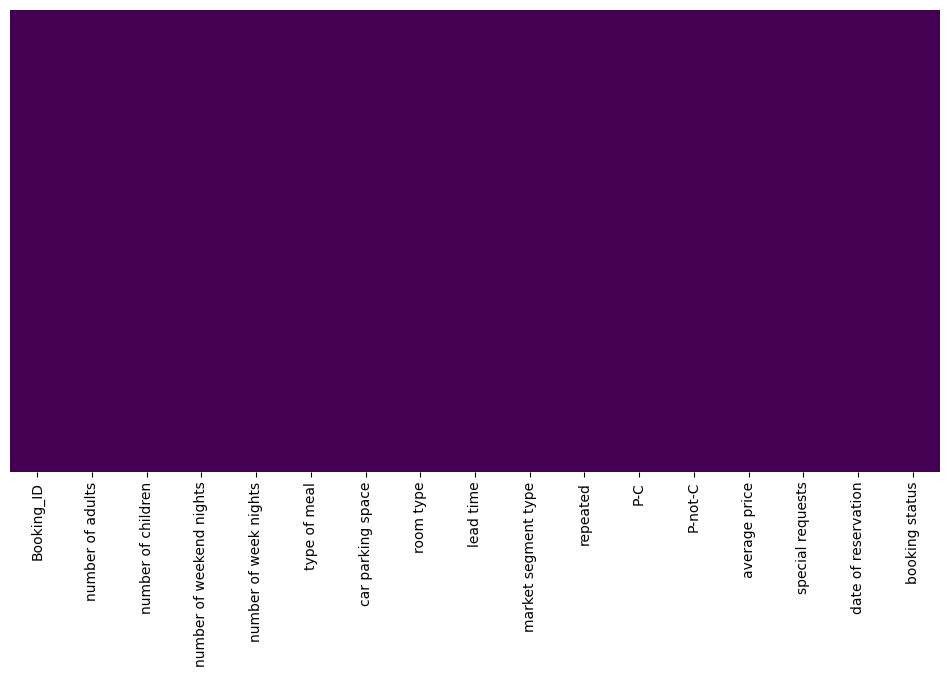

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.drop(columns=['Booking_ID'],axis=1,inplace=True)

In [18]:
# We Change it to dataframe 
My_group_by=df.groupby(['number of adults','number of children','number of weekend nights','number of week nights','room type','booking status']).size().reset_index().rename(columns={0:'Count'})

In [19]:
My_group_by.head()

,number of adults,number of children,number of weekend nights,number of week nights,room type,booking status,Count
0,0,1,2,4,Room_Type 2,Not_Canceled,1
1,0,2,0,1,Room_Type 1,Not_Canceled,1
2,0,2,0,1,Room_Type 2,Canceled,3
3,0,2,0,1,Room_Type 2,Not_Canceled,13
4,0,2,0,1,Room_Type 6,Not_Canceled,1


# ==================================================

### Extract Number Of The Family 

In [20]:
df['Total_Family_Number']=df['number of adults']+df['number of children']
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,Total_Family_Number
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,2
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled,3
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled,1


In [21]:
df['Total_Family_Number'] = df['Total_Family_Number'].astype(int)

In [22]:
df.drop(columns=['number of adults','number of children'],axis=1,inplace=True)

### Date Preprocessing 

In [23]:
df["date of reservation"] = pd.to_datetime(df["date of reservation"], errors='coerce')
df["date of reservation"] = pd.to_datetime(df["date of reservation"].fillna("02/2/2018").dt.strftime("%m/%d/%Y"))

In [24]:
df['Month'] = df['date of reservation'].dt.month.astype('Int64')
df['Year'] = df['date of reservation'].dt.year.astype('Int64')
df['Day_of_week'] = df['date of reservation'].dt.dayofweek

In [25]:
len(df[df['date of reservation']=='2018-2-29'])

0

In [26]:
df.isnull().sum()

number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
Total_Family_Number         0
Month                       0
Year                        0
Day_of_week                 0
dtype: int64

In [27]:
df.head()

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,Total_Family_Number,Month,Year,Day_of_week
0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,2,10,2015,4
1,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,1,11,2018,1
2,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,3,2,2018,2
3,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,1,5,2017,5
4,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,1,4,2018,2


In [28]:
df.drop(columns=['date of reservation'],axis=1,inplace=True)

# ============================================

## Data Visualization

#### Cancellation Analysis 

In [29]:
overall_cancellation_rate = df['booking status'].value_counts(normalize=True).get('Canceled', 0)
cancellation_by_segment = df.groupby('market segment type')['booking status'].value_counts(normalize=True).unstack().get('Canceled', 0)

In [30]:
monthly_cancellations = df.groupby('Month')['booking status'].value_counts(normalize=True).unstack().get('Canceled', 0)

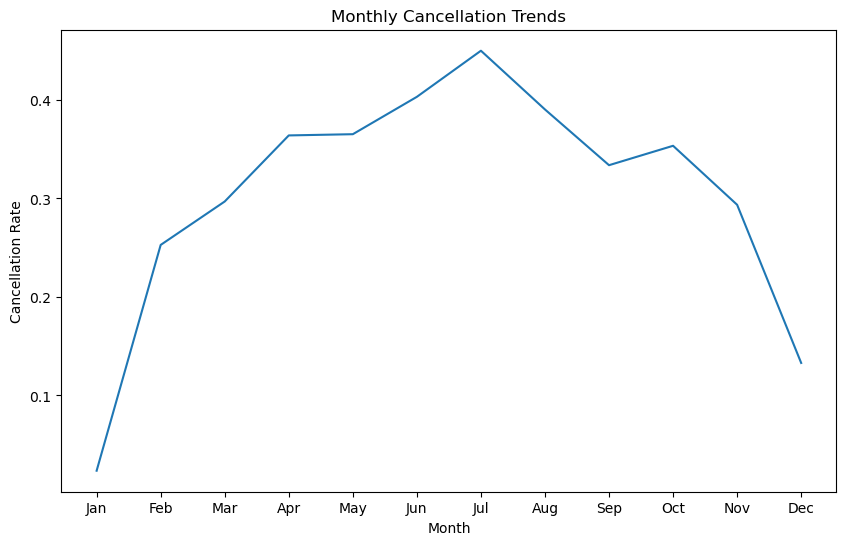

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_cancellations.index, y=monthly_cancellations.values)
plt.title('Monthly Cancellation Trends')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Observation : 
* **1)** In July the frequant of cancellation happend 
* **2)** the cancellation rate start to increase from jan to jul then it decreasing  from jul to dec 


# ========================================

#### Price Analysis

In [32]:
df['Days of reservation']=(df['number of weekend nights'] + df['number of week nights'])

In [33]:
df.drop(columns=['number of weekend nights','number of week nights'],axis=1,inplace=True)

In [34]:
df.head()

,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total_Family_Number,Month,Year,Day_of_week,Days of reservation
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2,10,2015,4,7
1,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1,11,2018,1,4
2,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3,2,2018,2,4
3,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1,5,2017,5,2
4,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1,4,2018,2,3


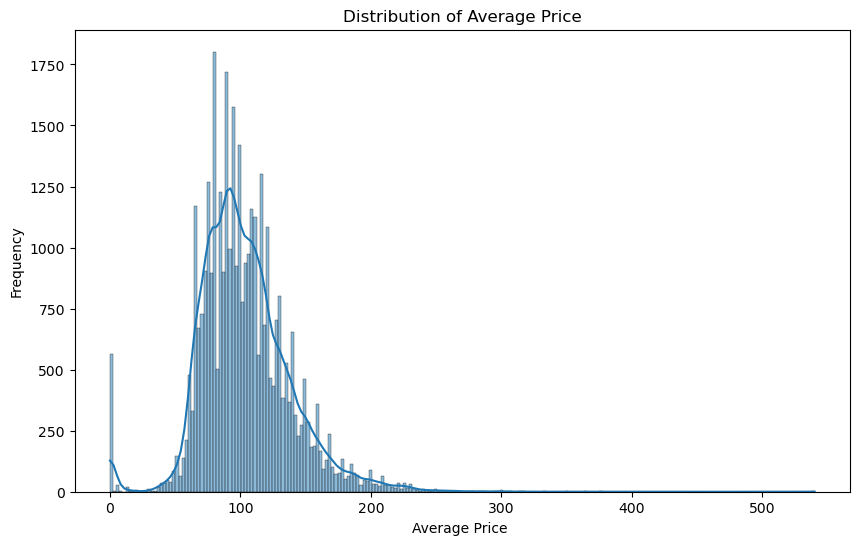

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average price'], kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price ')
plt.ylabel('Frequency')
plt.show()

In [36]:
overall_mean = np.mean(df['average price'])
print("Mean of the price distribution:", overall_mean)

Mean of the price distribution: 103.4216359377153


### Observation : 
* **1)** Its a right Distribution with mean price 103.4 over all its a good price  
* **2)** the data is semi normal means of there is an outlier 

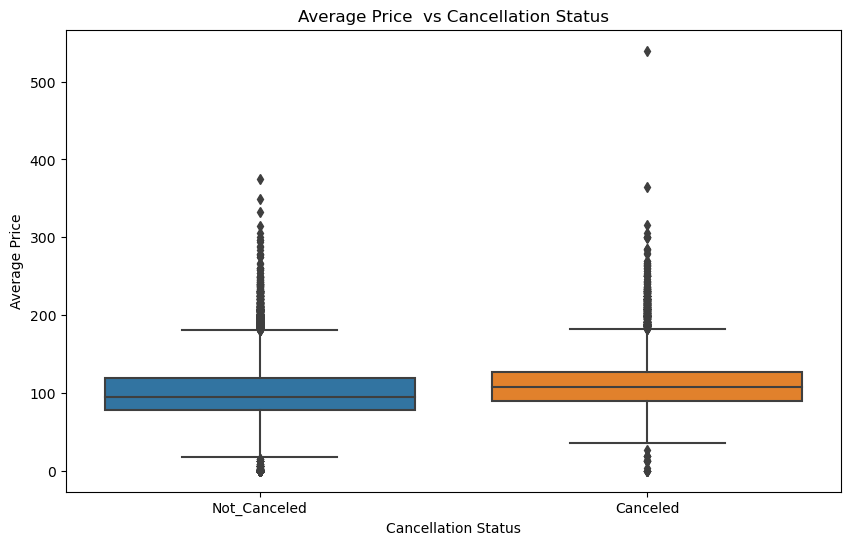

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking status', y='average price', data=df)
plt.title('Average Price  vs Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Average Price')
plt.show()

### Observation : 
* **1)** here we see the outliers of the prices based on the booking status  
* **2)** we see that the canceled outliers is heigher than the not_cancele  

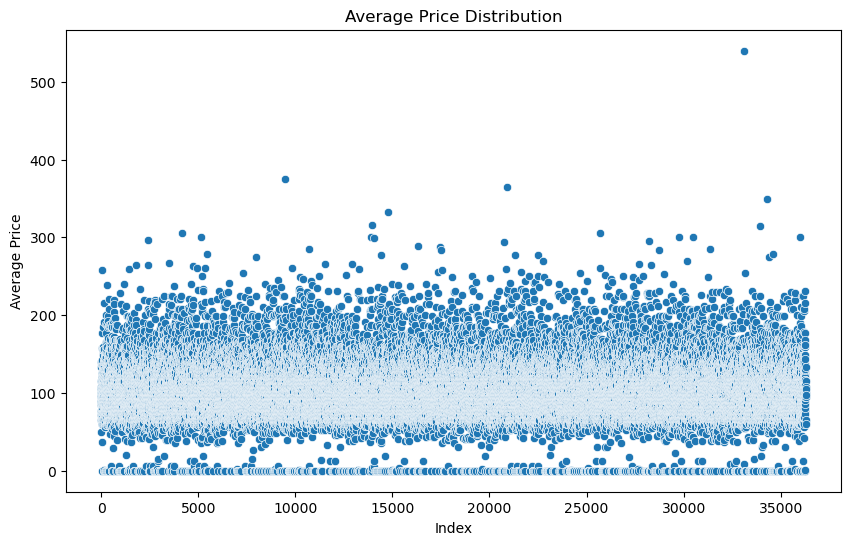

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='average price', data=df)
plt.title('Average Price Distribution')
plt.xlabel('Index')
plt.ylabel('Average Price')
plt.show()

# =========================================

#### Lead Time Analysis

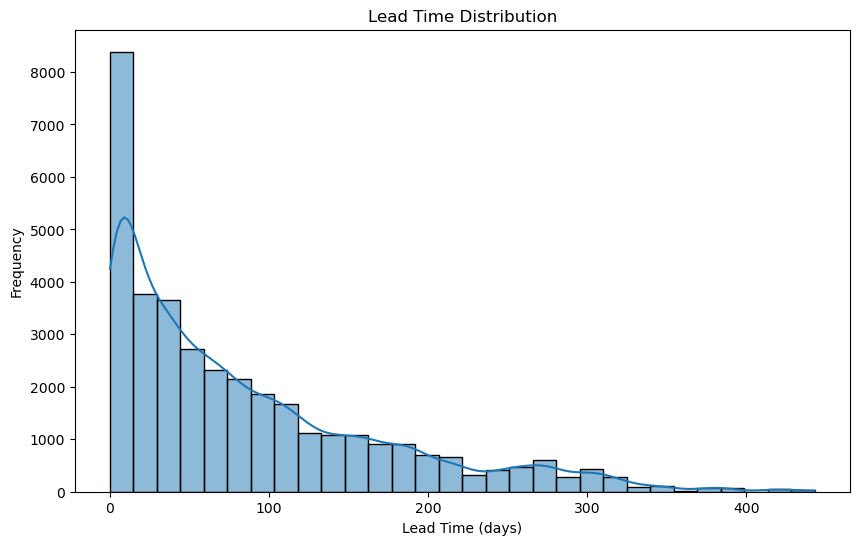

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead time'], bins=30, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

In [40]:
mean_lead_time = df['lead time'].mean()
mean_lead_time

85.2398511781728

### Observation : 
* **1)** The Distribution of the lead time is also skewed means there is an outlier   
* **2)** the mean lead time is : 85.2 
* **3)** we see that there is people comes after a long time from the booking day 

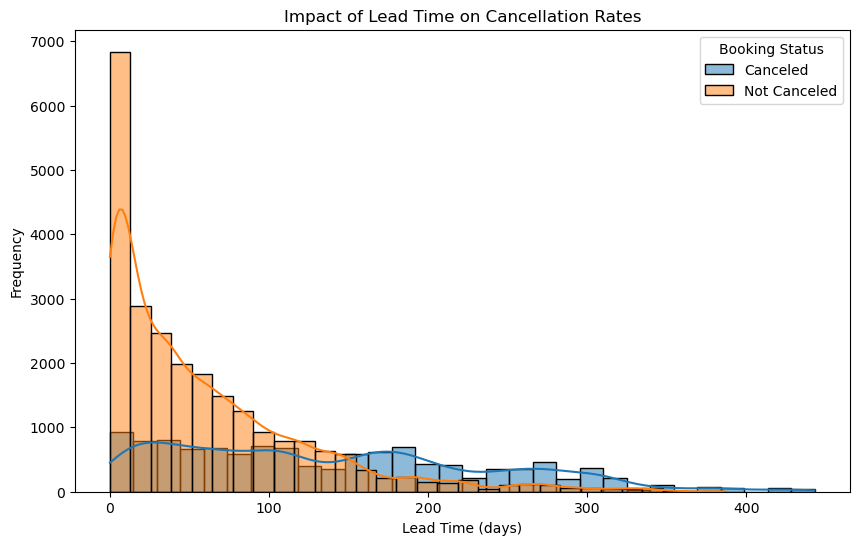

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['booking status'] == 'Canceled']['lead time'], bins=30, kde=True, label='Canceled')
sns.histplot(df[df['booking status'] == 'Not_Canceled']['lead time'], bins=30, kde=True, label='Not Canceled')
plt.title('Impact of Lead Time on Cancellation Rates')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.legend(title='Booking Status')
plt.show()

### Observation : 
* **1)** we see that the lead time for the cancelation is lower than the not_cancelation means overall its a good sign . 
* **2)** its also a right skewed  

booking status
Canceled        139.219615
Not_Canceled     58.933678
Name: lead time, dtype: float64


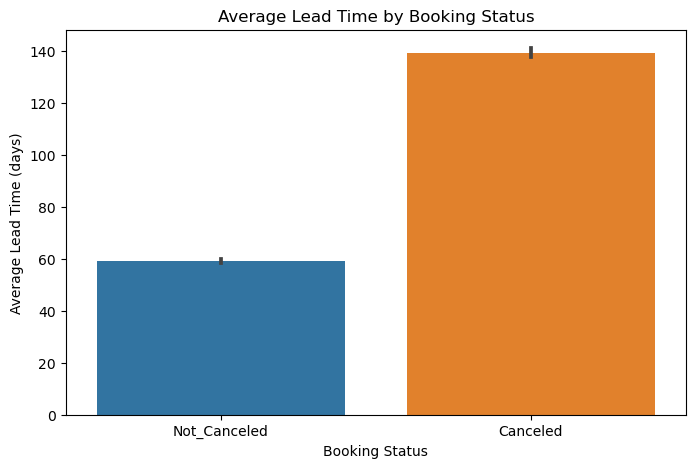

In [42]:
lead_time_cancel_corr = df.groupby('booking status')['lead time'].mean()
print(lead_time_cancel_corr)


plt.figure(figsize=(8, 5))
sns.barplot(x='booking status', y='lead time', data=df)
plt.title('Average Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Lead Time (days)')
plt.show()

### Observation : 
* **1)** we see AVG lead time for both cancel and not_cancel 
* **2)** Avg canceled is heigher than the not_cancel : indicate for late coming thats maybe the causation of cancelling 

# ========================================

#### Market Segment Analysis

In [43]:
booking_patterns = df.groupby('market segment type').size()
print("Booking Patterns Across Different Market Segments:")
print(booking_patterns)

Booking Patterns Across Different Market Segments:
market segment type
Aviation           125
Complementary      391
Corporate         2017
Offline          10531
Online           23221
dtype: int64


In [44]:
cancellation_rates = df.groupby('market segment type')['booking status'].apply(lambda x: (x == 'Canceled').mean())
print("\nCancellation Rates Among Different Market Segments:")
print(cancellation_rates)


Cancellation Rates Among Different Market Segments:
market segment type
Aviation         0.296000
Complementary    0.000000
Corporate        0.109073
Offline          0.299497
Online           0.365101
Name: booking status, dtype: float64


In [45]:
average_prices = df.groupby('market segment type')['average price'].mean()
print("\nAverage Prices Among Different Market Segments:")
print(average_prices)


Average Prices Among Different Market Segments:
market segment type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.633628
Online           112.252311
Name: average price, dtype: float64


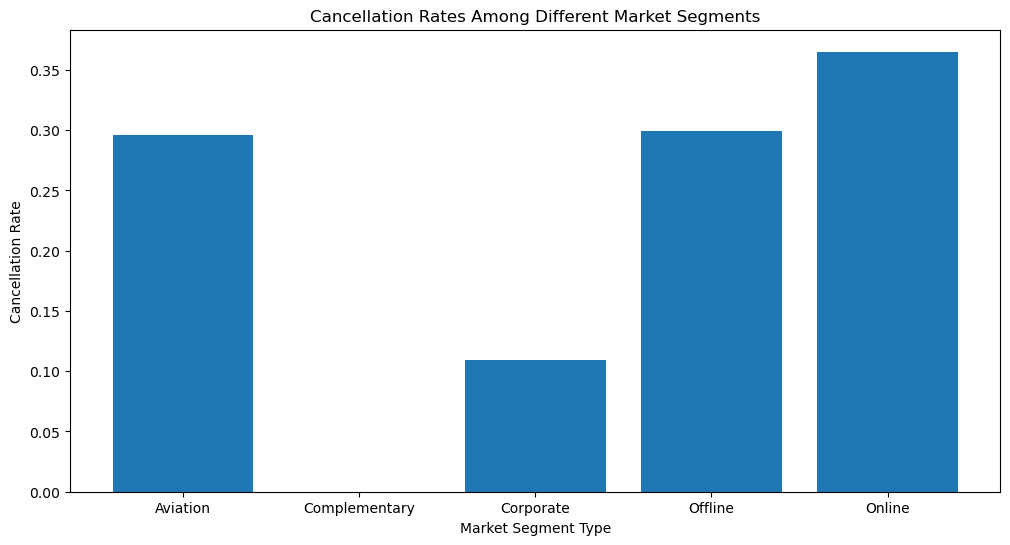

In [46]:
plt.bar(cancellation_rates.index, cancellation_rates.values)
plt.title('Cancellation Rates Among Different Market Segments')
plt.xlabel('Market Segment Type')
plt.ylabel('Cancellation Rate')
plt.show()

### Observation : 
* **1)** The cancellation for the online was easy thing to do thats why he is the heighest value Then Followed by the aviation .

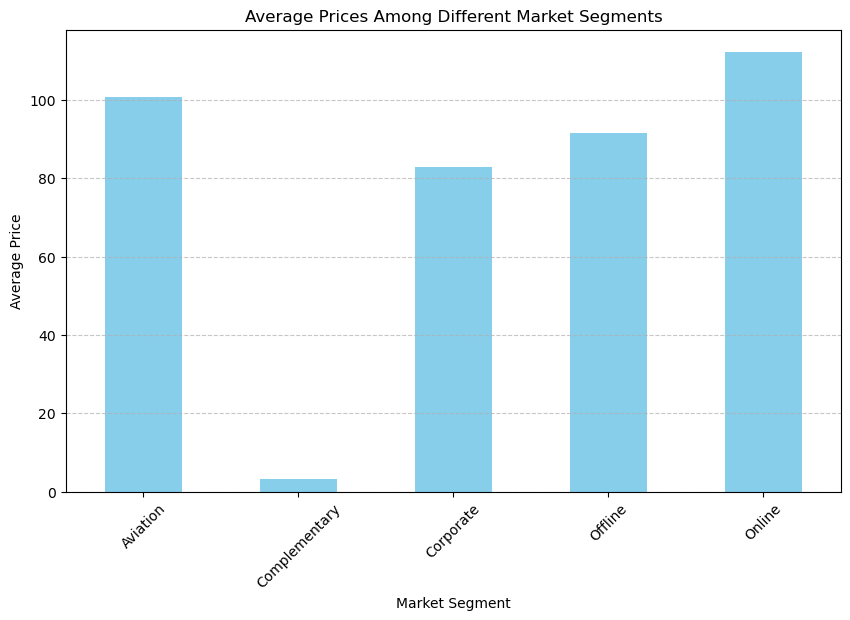

In [47]:
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices Among Different Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observation : 
* **1)** online also cost some tips thats why he is the heighest value .

#  ===============================================

#### Room Type Analysis

In [48]:
room_type_counts = df['room type'].value_counts()
print("Booking preferences for different room types:")
print(room_type_counts)

Booking preferences for different room types:
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


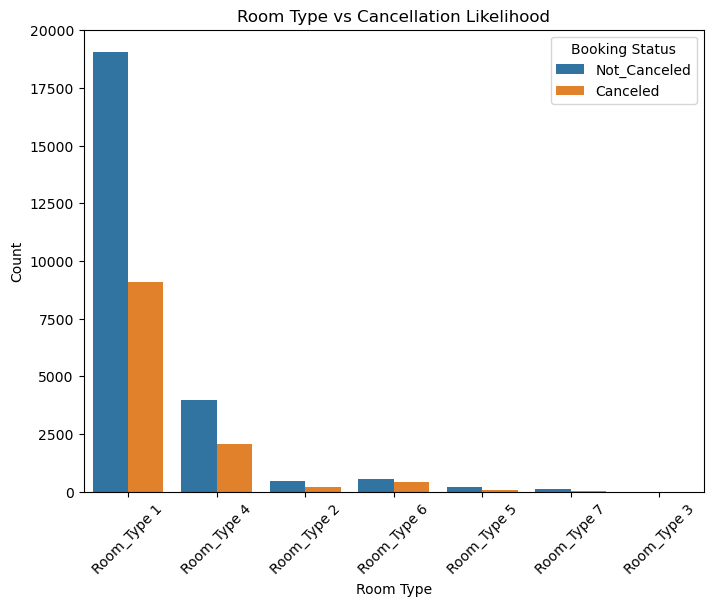

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room type', hue='booking status', data=df)
plt.title('Room Type vs Cancellation Likelihood')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.show()

### Observation : 
* **1)** Room_type 1 is the cheapest so thats indicate that people rent this type most 

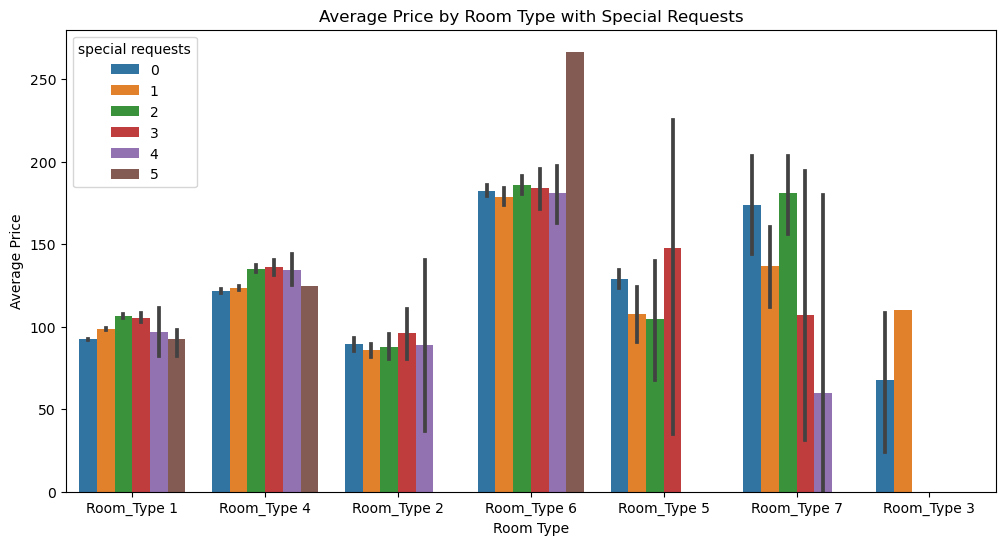

In [50]:
sns.barplot(data=df, x='room type', y='average price',hue='special requests') #palette=None This option is to spacifiy the color based on what i want 
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type with Special Requests')
plt.show()

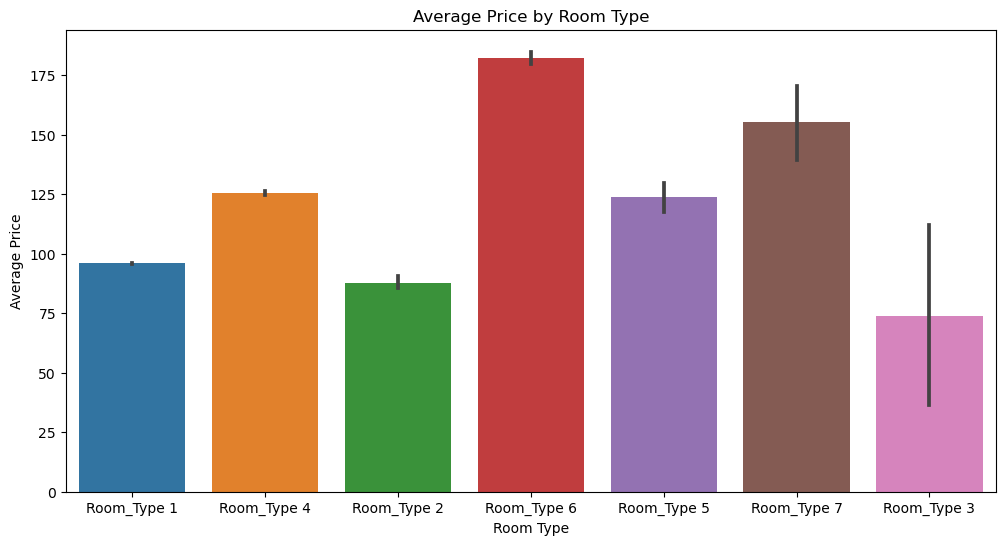

In [51]:
sns.barplot(data=df, x='room type', y='average price')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

### observation: 
* **1)**   Room_type 6 is the most requierd room and the heighest price so its a fancy room 
* **2)**   most of the special request is for Room_type 6 it means that its likely the rich pepole booking it 
* **3)**   special request 5 is the heighest price among all the special request

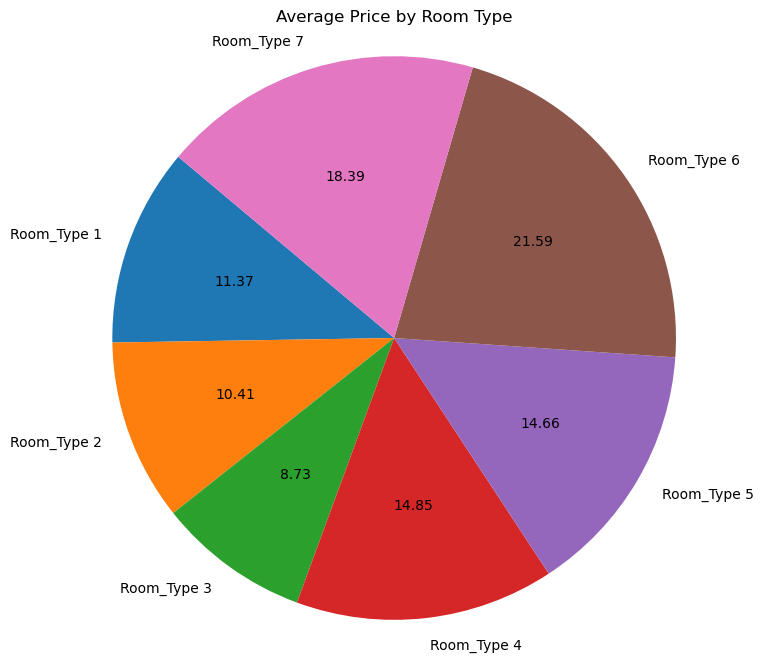

In [52]:
average_prices = df.groupby('room type')['average price'].mean()

plt.figure(figsize=(8, 8))
plt.pie(average_prices, labels=average_prices.index, startangle=140, autopct='%1.2f')
plt.title('Average Price by Room Type')
plt.axis('equal')
plt.show()


In [53]:
average_prices

room type
Room_Type 1     95.917067
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.285415
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: average price, dtype: float64

# ========================================

#### Special Requests Analysis

In [54]:
special_requests_counts = df['special requests'].value_counts()
print("Common Special Requests:")
print(special_requests_counts)

Common Special Requests:
special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64


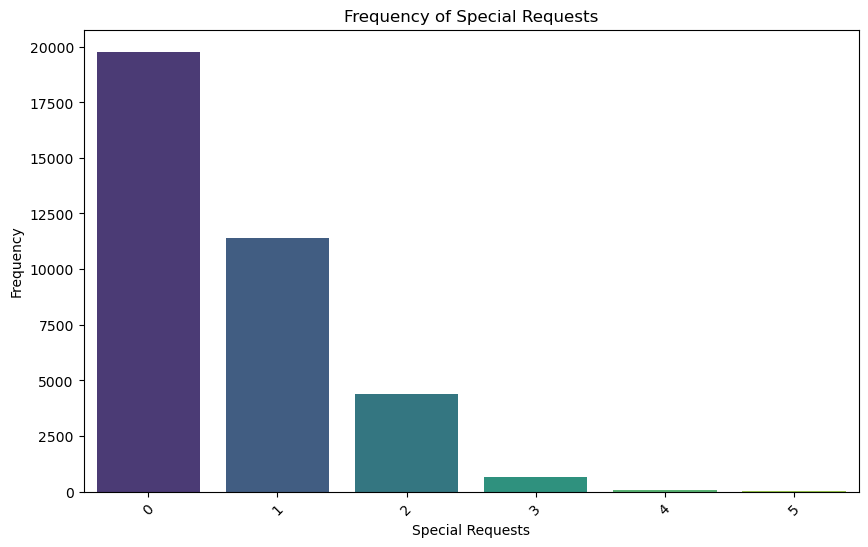

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=special_requests_counts.index, y=special_requests_counts.values, palette="viridis")
plt.title('Frequency of Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### observation: 
* **1)**   0 Is the most special request demand liklely to be the cheapest one 

In [56]:
cancellation_rates = df.groupby('special requests')['booking status'].value_counts(normalize=True).unstack()
print("\nCancellation Rates by Special Requests:")
print(cancellation_rates)


Cancellation Rates by Special Requests:
booking status    Canceled  Not_Canceled
special requests                        
0                 0.432103      0.567897
1                 0.237719      0.762281
2                 0.145967      0.854033
3                      NaN      1.000000
4                      NaN      1.000000
5                      NaN      1.000000


<Figure size 1000x600 with 0 Axes>

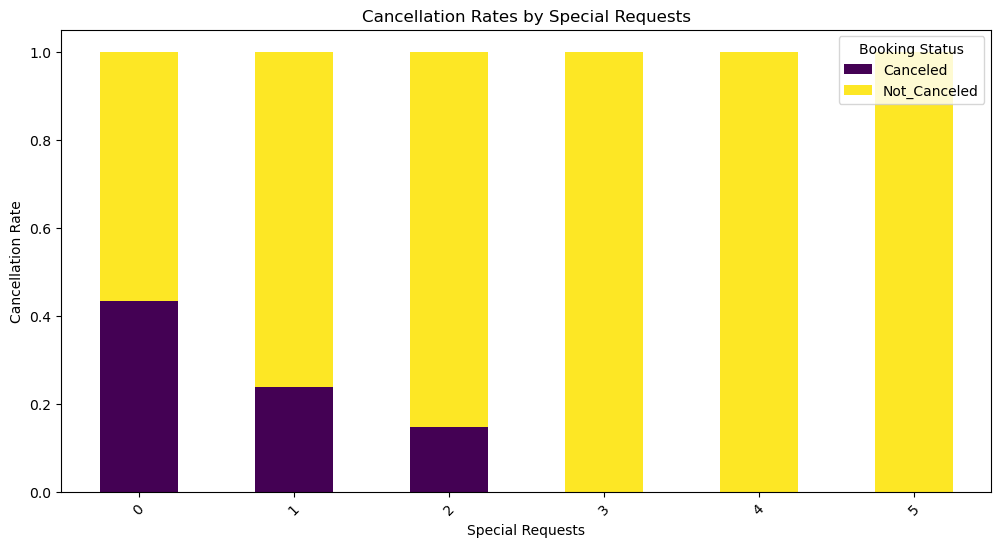

In [57]:
plt.figure(figsize=(10, 6))
cancellation_rates.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Cancellation Rates by Special Requests')
plt.xlabel('Special Requests')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.show()

### observation: 
* **1)**  We see from here that the book cancelation occuer in 0,1,2 special request . 
* **2)**  its likely that this is one of the cancellation reasons (Maybe Bad Request)(doesnt fit all the People)

# =================================

#### Booking Trends

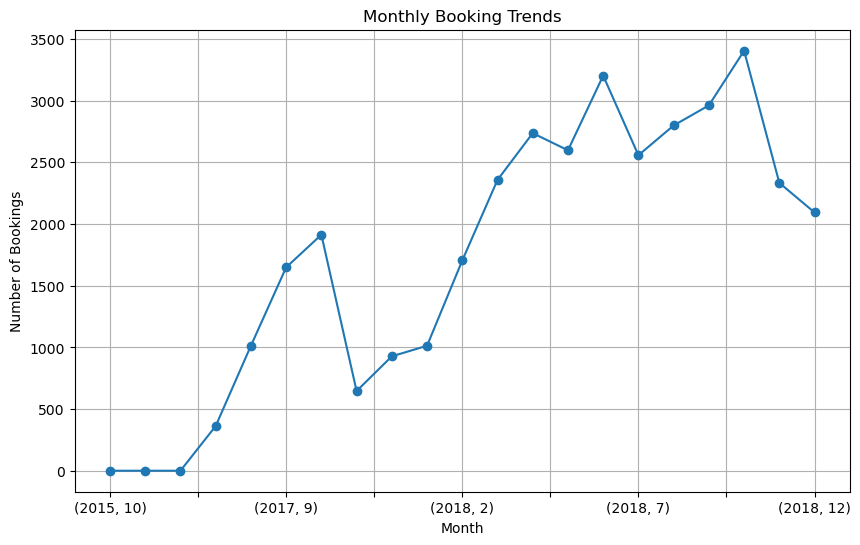

In [58]:
monthly_bookings = df.groupby(['Year', 'Month']).size()
monthly_bookings.plot(kind='line', figsize=(10, 6), marker='o', title='Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

### Observations : 
* **1)** The Booking occure the most from july to october.  
* **2)** Maybe its a summer holidays time  

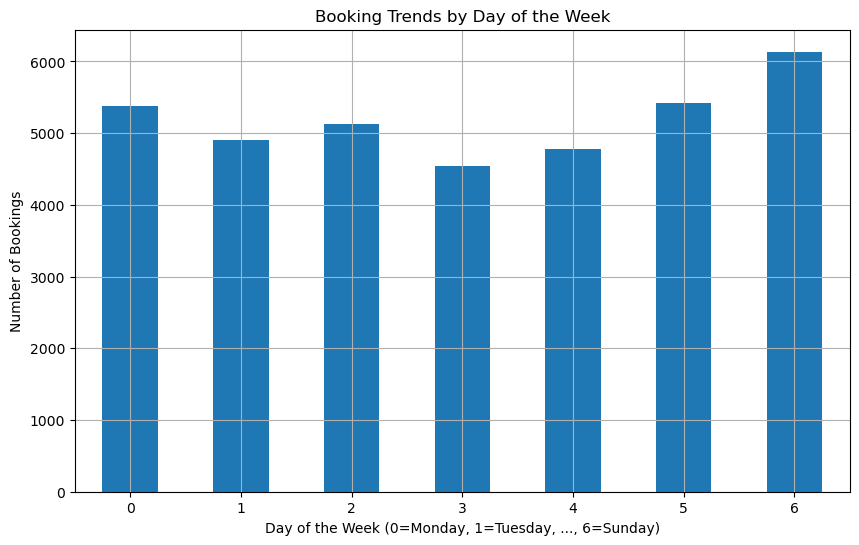

In [59]:
day_of_week_bookings = df.groupby('Day_of_week').size() # size= count of the days
day_of_week_bookings.plot(kind='bar', figsize=(10, 6), title='Booking Trends by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### Observations : 
* **1)** The Booking occure the most in Sunday  in usa its A day off for most people thats maybe the reason 

In [60]:
cancellation_rates = df.groupby(['Year', 'Month', 'booking status']).size().unstack()
cancellation_rates['Cancellation_Rate'] = cancellation_rates['Canceled'] / (cancellation_rates['Canceled'] + cancellation_rates['Not_Canceled']) * 100
cancellation_rates.reset_index(inplace=True)
cancellation_heatmap = cancellation_rates.pivot(index='Month', columns='Year', values='Cancellation_Rate')

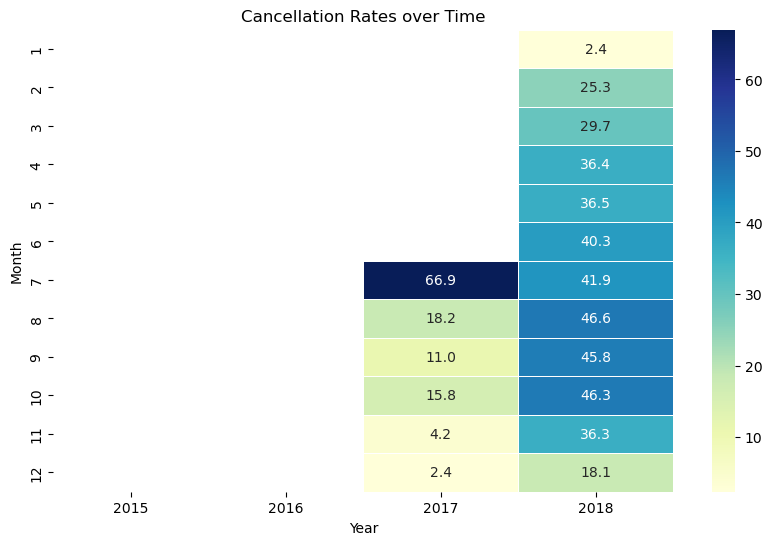

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(cancellation_heatmap, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Cancellation Rates over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

### Observations : 
* **1)** The Cancelation occuers in Augest the most in 2018 
* **2)** The Cancelation occuers in july the most in 2017


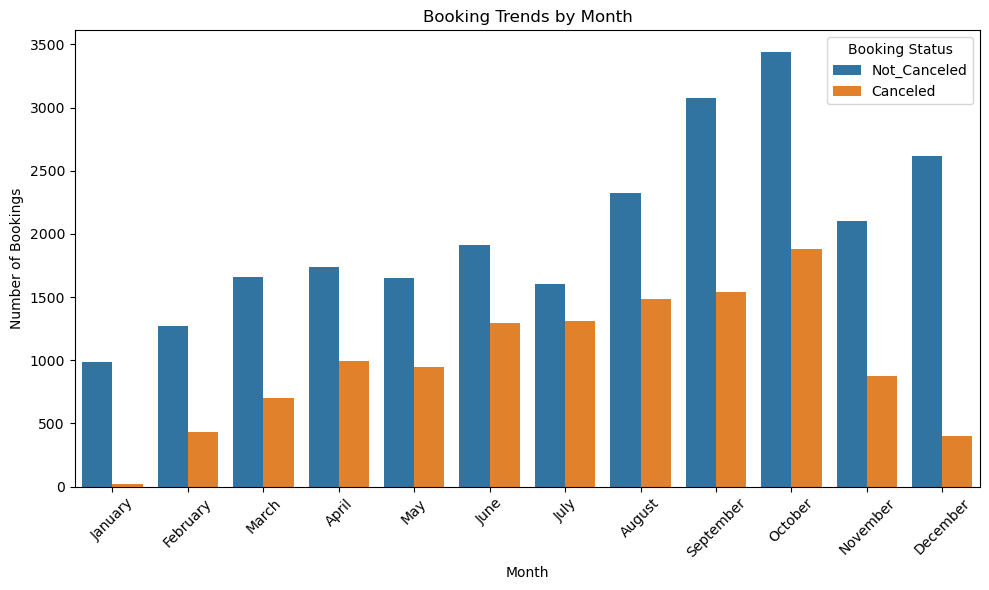

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='booking status')
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()

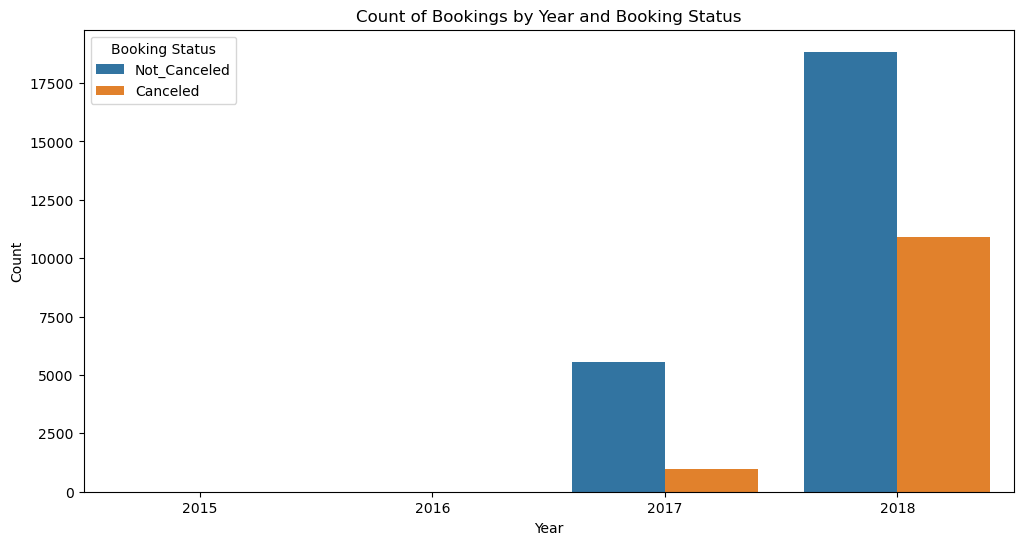

In [63]:
sns.countplot(data=df,x='Year',hue='booking status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Bookings by Year and Booking Status')
plt.legend(title='Booking Status')
plt.show()

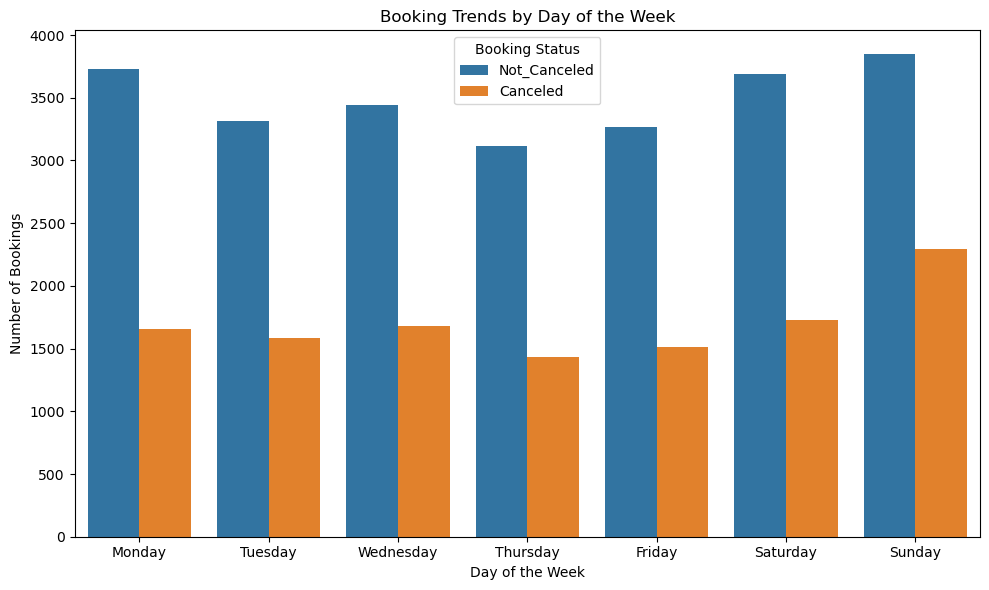

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_of_week', hue='booking status')
plt.title('Booking Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(7), labels=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()

### Observations : 
* **1)** september and October is the month where the booking occuers the most , Maybe because of the good wather  
* **2)** year 2018 was the most booking year because of the increasing of the hotels Maybe  
* **3)** most people doesnt cancel the booking in both Figuers 
* **4)** most of the booking occuer in sunday and also we see the cancellation occuer in sunday also 

# =============================================

#### Parking Space Analysis

In [65]:
parking_booking_counts = df.groupby(['car parking space', 'booking status']).size().unstack(fill_value=0)
print("Booking counts based on parking space availability:")
print(parking_booking_counts)

Booking counts based on parking space availability:
booking status     Canceled  Not_Canceled
car parking space                        
0                     11775         23386
1                       114          1010


In [66]:
parking_cancel_counts = df[df['booking status'] == 'Canceled'].groupby('car parking space').size()
total_cancel_counts = df['booking status'].value_counts()['Canceled']
cancel_rates = (parking_cancel_counts / total_cancel_counts) * 100
print("\nCancellation rates based on parking space availability:")
print(cancel_rates)


Cancellation rates based on parking space availability:
car parking space
0    99.04113
1     0.95887
dtype: float64


In [67]:
average_price_by_parking = df.groupby('car parking space')['average price'].mean()
print("\nAverage price based on parking space availability:")
print(average_price_by_parking)


Average price based on parking space availability:
car parking space
0    103.037026
1    115.453016
Name: average price, dtype: float64


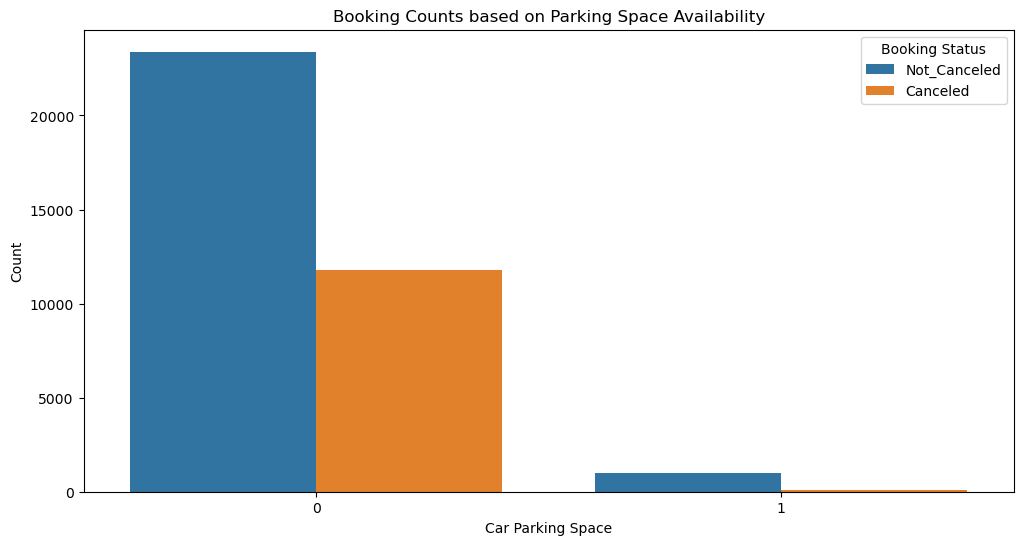

In [68]:
sns.countplot(x='car parking space', hue='booking status', data=df)
plt.title('Booking Counts based on Parking Space Availability')
plt.xlabel('Car Parking Space')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

### Observations : 
* **1)** most people choose with no parking means they are not coming by there own cars .  
* **2)** the people how choose parking most likely that they are coming in there cars.  

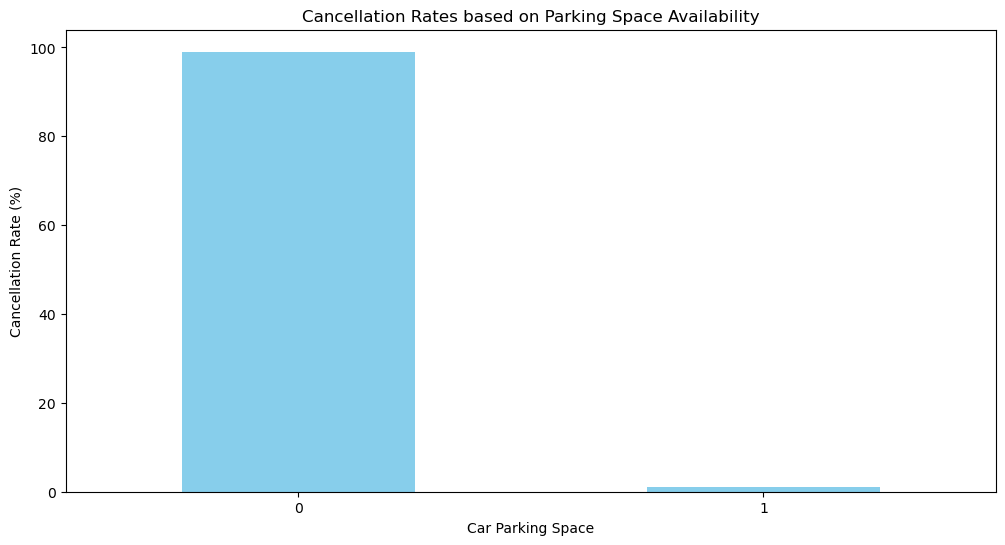

In [69]:
cancel_rates.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rates based on Parking Space Availability')
plt.xlabel('Car Parking Space')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.show()

### Observations : 
* **1)** We see That the cancellation also occuer in the no parking space the most 

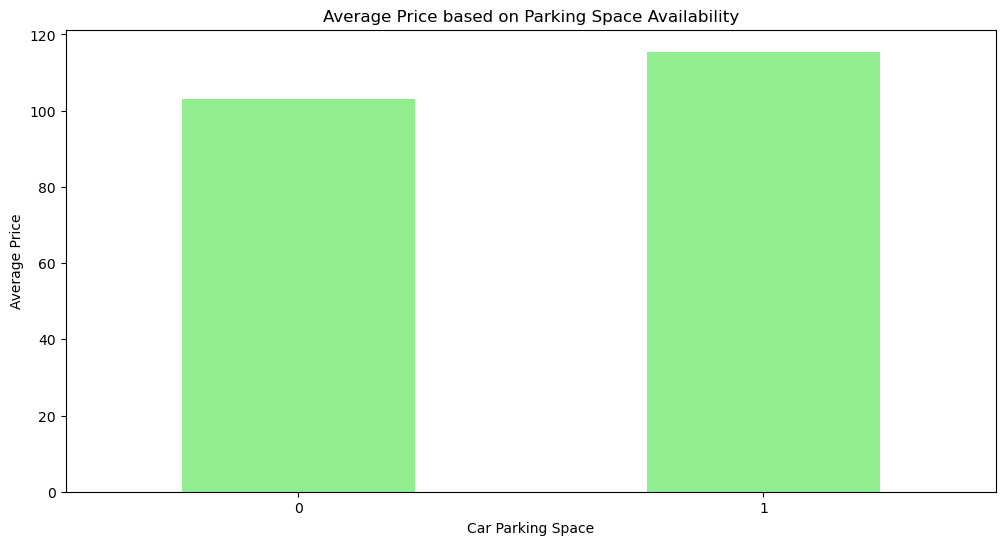

In [70]:
average_price_by_parking.plot(kind='bar', color='lightgreen')
plt.title('Average Price based on Parking Space Availability')
plt.xlabel('Car Parking Space')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Observations : 
* **1)** here we see that if you want a parking space it will cost you more money 


# =====================================

#### Distribution of Booking 

#### The chart displays the percentage of each booking status category relative to the total number of bookings. 

In [71]:
booking_labels=df['booking status'].value_counts().index
booking_status=df['booking status'].value_counts().values

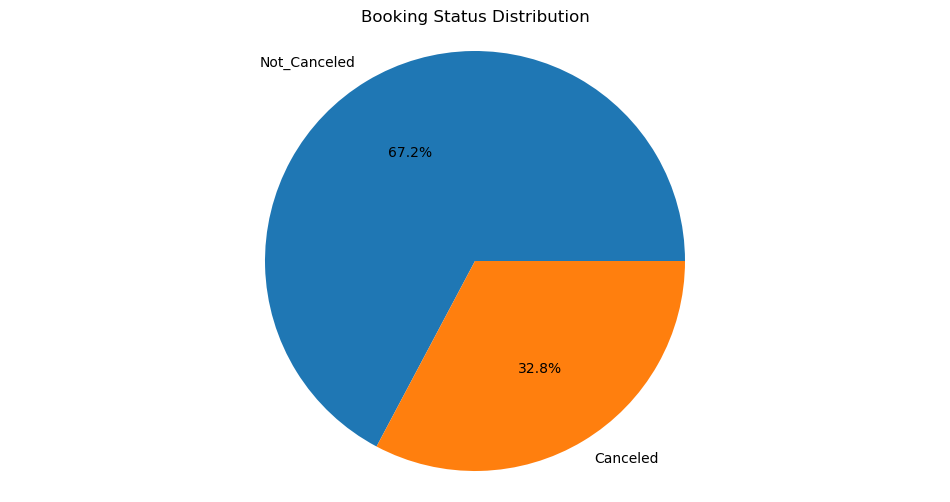

In [72]:
plt.pie(booking_status,labels=booking_labels, autopct='%1.1f%%')
plt.title('Booking Status Distribution')
plt.axis('equal')
plt.show()

## observation: 
*  **We Can See That The status of not_canceled is larger then canceled which  indicates that the majority of bookings result in guests following through with their reservations, suggesting a positive trend in customer commitment and satisfaction with the booking** 

# =====================================

#### Family Analysis 

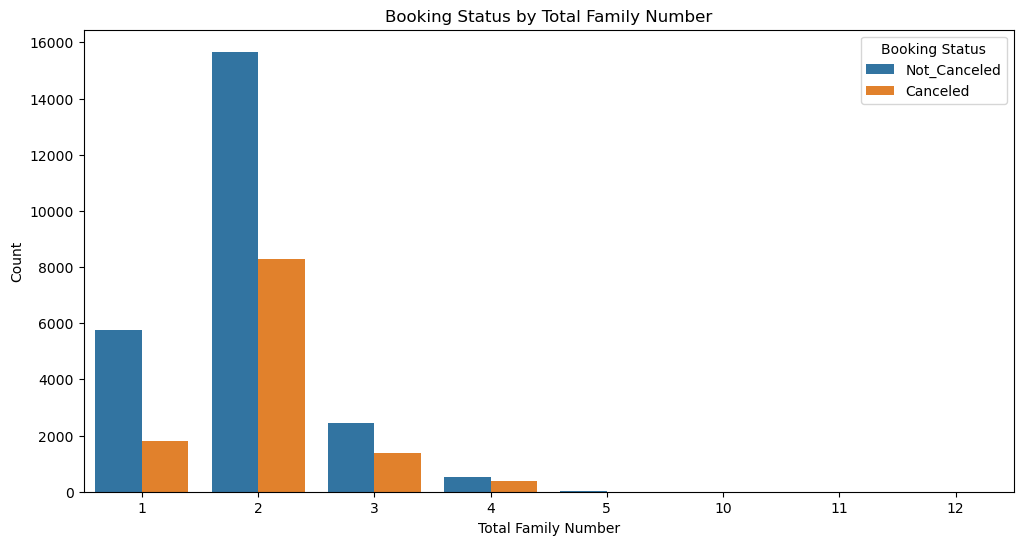

In [73]:
sns.countplot(data=df,x='Total_Family_Number',hue='booking status')
plt.xlabel('Total Family Number')
plt.ylabel('Count')
plt.title('Booking Status by Total Family Number')
plt.legend(title='Booking Status')
plt.show()

### observation: 
* **1)**   we see that the Family with 2 members are the most booking and cancelling 
* **2)**   indicate that Family with low number of members are most liklely booking and cancelling 

# ============================================

### Repeated vs Cancelation  Analysis

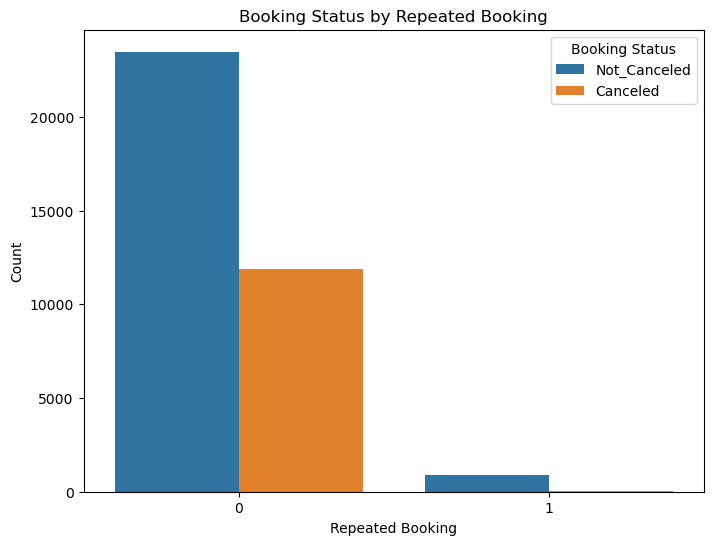

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='repeated', hue='booking status', data=df)
plt.title('Booking Status by Repeated Booking')
plt.xlabel('Repeated Booking')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

### observation: 
* **1)**   we see that who ever does repeate the booking its likely not cancelling  

# =========================================

### Prob of cancelation and not cancelation  vs the booking status Analysis

In [75]:
prob_pc = df[df['booking status'] == 'Canceled']['P-C'].mean()
prob_not_pc = df[df['booking status'] == 'Not_Canceled']['P-not-C'].mean()

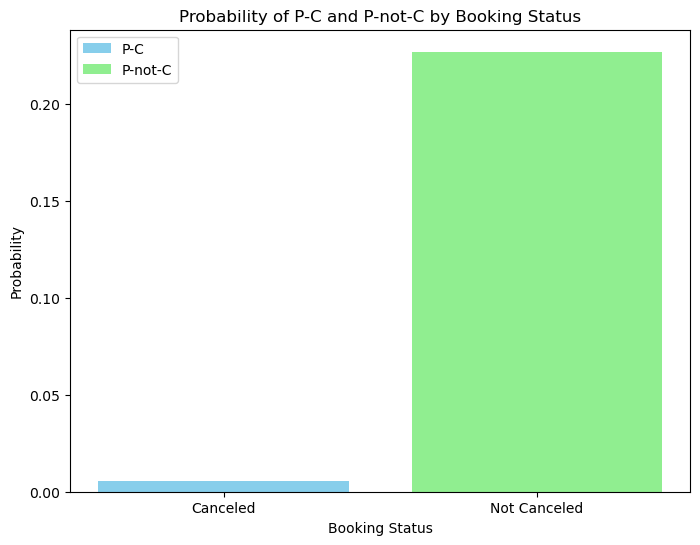

In [76]:
plt.figure(figsize=(8, 6))
bars = plt.bar(x=['Canceled', 'Not Canceled'], height=[prob_pc, prob_not_pc], color=['skyblue', 'lightgreen'])
plt.title('Probability of P-C and P-not-C by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Probability')
plt.legend(bars, ['P-C', 'P-not-C'])
plt.show()

### observation: 
* **1)**   we see that the if there is an prob of cancellation he will cancel most likely 

# ==============================================

### Type of meal vs price 

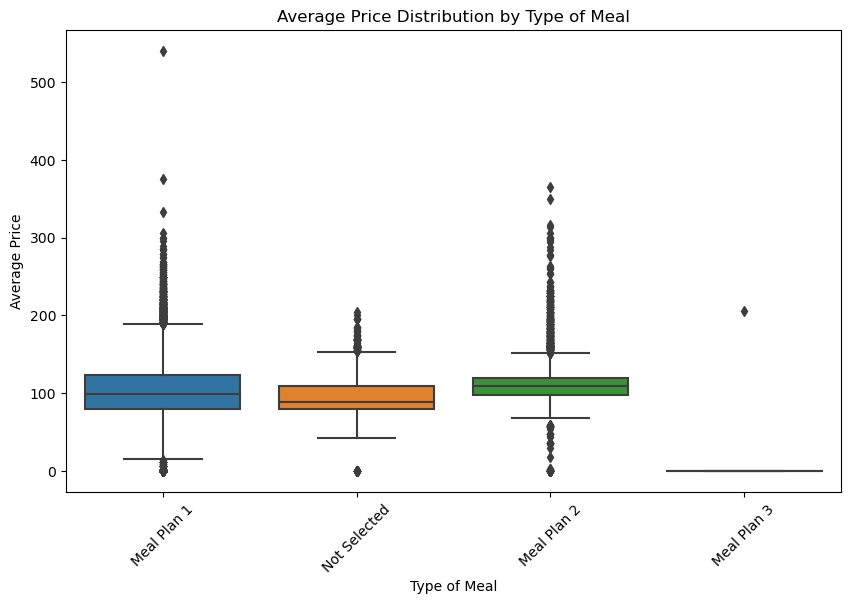

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type of meal', y='average price', data=df)
plt.title('Average Price Distribution by Type of Meal')
plt.xlabel('Type of Meal')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

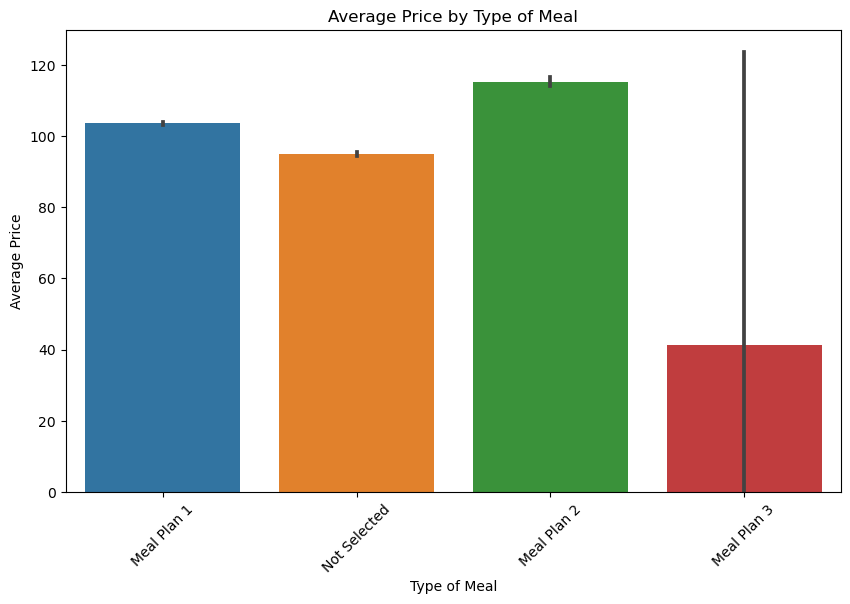

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type of meal', y='average price', data=df)
plt.title('Average Price by Type of Meal')
plt.xlabel('Type of Meal')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

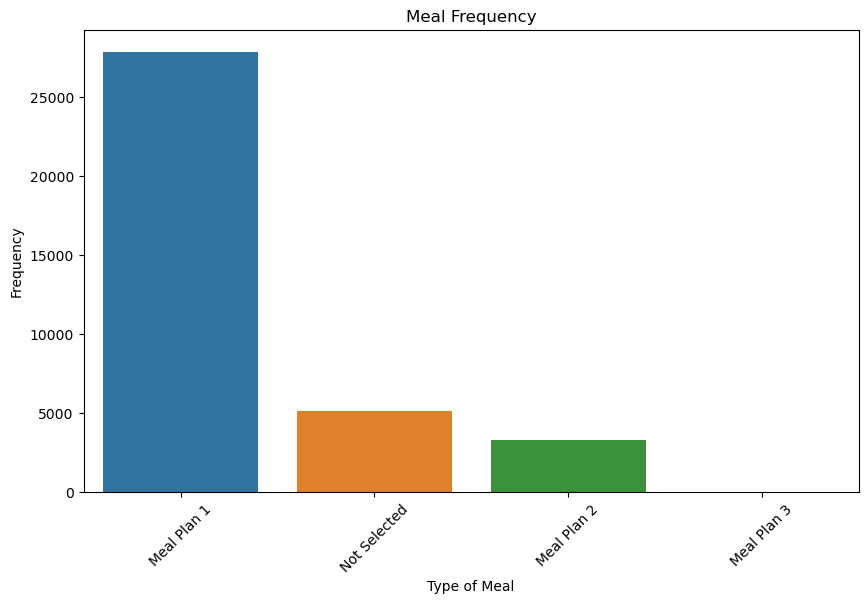

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type of meal', data=df)
plt.title('Meal Frequency')
plt.xlabel('Type of Meal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# Observation :
* **1)** Meal type 1 is the most required meal Thats mean its a good meal and its price fit to every one 
* **2)** Meal type 2 has the heighest price 

# =========================================

In [80]:
df[df['average price']==max(df['average price'])]

,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total_Family_Number,Month,Year,Day_of_week,Days of reservation
33114,Meal Plan 1,0,Room_Type 1,35,Offline,0,0,0,540.0,0,Canceled,2,3,2018,6,1


In [81]:
df[df['Days of reservation']==7].head()

,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total_Family_Number,Month,Year,Day_of_week,Days of reservation
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2,10,2015,4,7
50,Not Selected,0,Room_Type 1,124,Online,0,0,0,87.95,0,Not_Canceled,1,5,2018,2,7
78,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,121.55,2,Canceled,3,6,2018,3,7
94,Meal Plan 1,0,Room_Type 1,171,Online,0,0,0,111.59,0,Canceled,2,8,2018,3,7
116,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,135.76,0,Canceled,3,4,2018,6,7


In [82]:
df.columns

Index(['type of meal', 'car parking space', 'room type', 'lead time',
       'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price',
       'special requests', 'booking status', 'Total_Family_Number', 'Month',
       'Year', 'Day_of_week', 'Days of reservation'],
      dtype='object')

### Distribution of Numaric Data

In [83]:
numerical_features = ['Days of reservation','lead time', 'P-C', 'P-not-C', 'average price', 'special requests', 'Total_Family_Number']

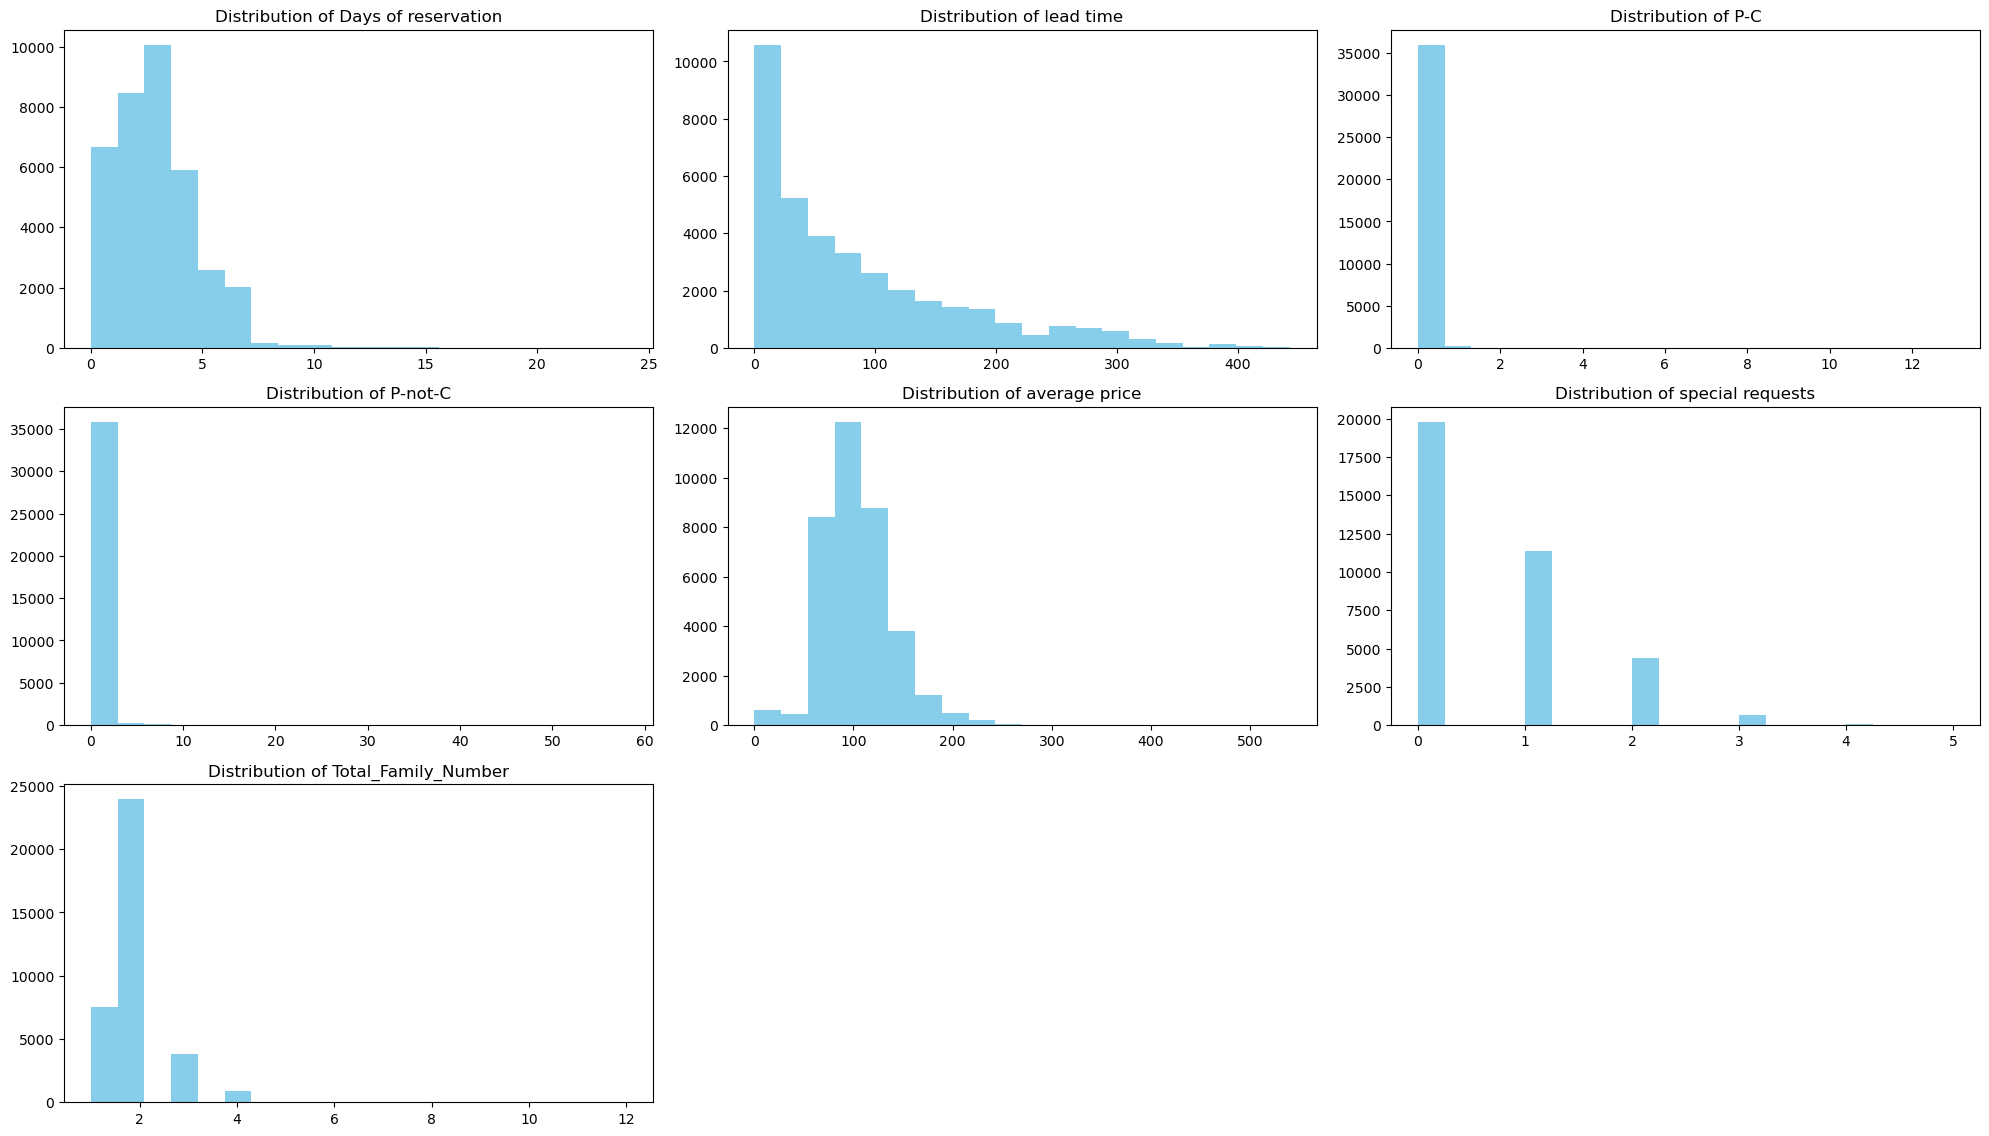

In [84]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# ===============================================

#### Outlier Detection 

In [85]:
# df.isnull().sum()

In [86]:
# def iqr_method(df):
#     perc_75 = np.percentile(df, 75)
#     perc_25 = np.percentile(df, 25)
#     iqr_range = perc_75 - perc_25
#     iqr_upper = perc_75 + 1.5 * iqr_range
#     iqr_lower = perc_25 - 1.5 * iqr_range
#     return(iqr_lower,iqr_upper)

In [87]:
# lower,upper=iqr_method(df['average price'])
# print('upper limit for price   = ', upper )
# print('lower limit for price   = ', lower)

In [88]:
# df=df[(df['average price']>lower)&(df['average price']<upper)]

In [89]:
# lower,upper=iqr_method(df['lead time'])
# print('upper limit for price   = ', upper )
# print('lower limit for price   = ', lower)

In [90]:
# df=df[(df['lead time']>lower)&(df['lead time']<upper)]

#### Our conclusion is that it's a Problematic outlier should Be Removed 

### using z-score 



In [91]:
def remove_outliers(df, threshold=3):
    cols = ['lead time', 'average price']
    df_clean = df.copy()  
            # initialize a new dataframe to avoid modifying the original
    for col in cols:
        zscore = (df_clean[col] - df_clean[col].mean()) / df_clean[col].std()
        df_clean = df_clean[abs(zscore) <= threshold]
    return df_clean

In [92]:
df=remove_outliers(df)

In [93]:
df.head()

,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total_Family_Number,Month,Year,Day_of_week,Days of reservation
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2,10,2015,4,7
1,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1,11,2018,1,4
2,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3,2,2018,2,4
3,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1,5,2017,5,2
4,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1,4,2018,2,3


# ===============================================

# Lets explane encoding 

## Label Encoding

Label encoding is a technique used to convert categorical data into numerical format. In this method, each category is assigned a unique integer value. Label encoding is commonly used when dealing with categorical variables in machine learning models.

### Example:

Suppose we have a dataset containing a categorical feature "Color" with three categories: Red, Green, and Blue.

|   Color   |
|-----------|
|   Red     |
|  Green    |
|   Blue    |
|   Green   |

We can use label encoding to convert these categories into numerical values:

- Red: 0
- Green: 1
- Blue: 2

After label encoding, the dataset would look like this:

|   Color   |
|-----------|
|    0      |
|    1      |
|    2      |
|    1      |

Label encoding provides a straightforward way to handle categorical data, but it may introduce ordinality where none exists, which could affect the performance of certain machine learning algorithms.

#### =======================

## One-Hot Encoding

One-hot encoding is a technique used to represent categorical variables as binary vectors. Each category is represented by a binary vector where only one bit is hot (1), and the rest are cold (0). One-hot encoding is commonly used in machine learning models, especially when dealing with categorical data that do not have ordinal relationships.

### Example:

Suppose we have a dataset containing a categorical feature "Fruit" with three categories: Apple, Banana, and Orange.

|  Fruit   |
|----------|
|  Apple   |
|  Banana  |
|  Orange  |
|  Banana  |

We can use one-hot encoding to convert these categories into binary vectors:

- Apple: [1, 0, 0]
- Banana: [0, 1, 0]
- Orange: [0, 0, 1]

After one-hot encoding, the dataset would look like this:

|  Apple  |  Banana  |  Orange  |
|---------|----------|----------|
|    1    |    0     |    0     |
|    0    |    1     |    0     |
|    0    |    0     |    1     |
|    0    |    1     |    0     |

Each category is now represented by a binary vector, with a 1 in the position corresponding to the category and 0s elsewhere.

One-hot encoding is useful for categorical variables with no inherent ordinal relationship, as it avoids introducing unintended relationships between categories.
# ===================================

## Target Encoding

Target encoding, also known as mean encoding or likelihood encoding, is a technique used to encode categorical variables by replacing categories with the mean of the target variable for each category. This method is commonly used in predictive modeling tasks, especially when dealing with categorical features with high cardinality.

### Example:

Suppose we have a dataset containing a categorical feature "City" and a target variable "Salary." We want to predict salaries based on the city where individuals work.

|   City   |  Salary  |
|----------|----------|
|  London  |  50000   |
|  Paris   |  60000   |
|  Tokyo   |  55000   |
|  London  |  52000   |
|  Tokyo   |  58000   |

To apply target encoding, we calculate the mean salary for each city:

- London: mean salary = (50000 + 52000) / 2 = 51000
- Paris: mean salary = 60000
- Tokyo: mean salary = (55000 + 58000) / 2 = 56500

Then, we replace each city with its corresponding mean salary:

|   City   |  Salary  |
|----------|----------|
|  51000   |  50000   |
|  60000   |  60000   |
|  56500   |  55000   |
|  51000   |  52000   |
|  56500   |  58000   |

After target encoding, the categorical variable "City" has been replaced with numerical values representing the mean salary for each city.

Target encoding can be useful for high cardinality categorical variables, but it may lead to overfitting if not properly regularized, especially in small datasets.
# ==================================

## Binary-to-Text Encoding: Base64

Binary-to-text encoding is a method used to represent binary data as text, making it suitable for transmission or storage in systems that handle only text data. One common binary-to-text encoding scheme is Base64 encoding.

Base64 encoding converts binary data into a text format using a set of 64 ASCII characters. It represents every three bytes of binary data as four ASCII characters. This encoding scheme is widely used in email attachments, URLs, and binary file formats.

### Example:

Suppose we have the following binary data: `01001000 01100101 01101100 01101100 01101111`, which represents the ASCII characters for the word "Hello".

To convert this binary data into Base64 encoding:

1. Split the binary data into groups of six bits:

010010 000110 010101 101100 011011 000110 110011 011011 110110 011011

2. Convert each group of six bits into its corresponding Base64 character using a Base64 encoding table:
010010 -> S
000110 -> G
010101 -> V
101100 -> u
011011 -> 7
000110 -> G
110011 -> z
011011 -> 7
110110 -> u
011011 -> 7

3. Concatenate the Base64 characters to get the final encoded string: `SGVsbG8=`.

This Base64 encoded string can now be safely transmitted or stored as text data, and it can be easily decoded back into its original binary form when needed.

Base64 encoding is efficient for representing binary data as text and is widely supported across different systems and programming languages. However, it increases the size of the data by approximately 33% compared to the original binary data.

# =====================================

## Frequency Encoding

Frequency encoding is a technique used to encode categorical variables by replacing categories with their frequency of occurrence in the dataset. In this method, each category is replaced with the count of occurrences (or frequency) of that category in the dataset. Frequency encoding is particularly useful for categorical variables with high cardinality.

### Example:

Suppose we have a dataset containing a categorical feature "City" with the following categories:

- New York
- London
- Paris
- London
- Tokyo
- New York

To apply frequency encoding to the "City" feature, we calculate the frequency of each category:

- New York: 2
- London: 2
- Paris: 1
- Tokyo: 1

Then, we replace each category with its corresponding frequency:

|   City   |
|----------|
|    2     |
|    2     |
|    1     |
|    2     |
|    1     |
|    2     |

After frequency encoding, the categorical variable "City" has been replaced with numerical values representing the frequency of occurrence of each category in the dataset.

Frequency encoding helps capture the information about the distribution of categories in the dataset, which can be beneficial for certain machine learning algorithms. However, it may lead to overfitting if the frequency of categories is correlated with the target variable.
# ===============================

## Hash Encoding

Hash encoding is a technique used to encode categorical variables by applying a hashing function to each category. In this method, each category is replaced with the hash value generated by a hash function. Hash encoding is useful for reducing the dimensionality of categorical variables and handling high cardinality features.

### Example:

Suppose we have a dataset containing a categorical feature "City" with the following categories:

- New York
- London
- Paris
- Tokyo

To apply hash encoding to the "City" feature, we use a hash function to generate hash values for each category:

- New York: hash("New York") = 12345
- London: hash("London") = 67890
- Paris: hash("Paris") = 23456
- Tokyo: hash("Tokyo") = 78901

Then, we replace each category with its corresponding hash value:

|   City   |
|----------|
|  12345   |
|  67890   |
|  23456   |
|  78901   |

After hash encoding, the categorical variable "City" has been replaced with numerical values generated by applying a hash function to each category.

Hash encoding can efficiently handle high cardinality categorical variables and reduce the dimensionality of the feature space. However, it may lead to collisions (different categories mapping to the same hash value), which can affect model performance.
# ==================================

## Ordinal Encoding

Ordinal encoding is a technique used to encode categorical variables with ordinal relationships into numerical format. In this method, each category is assigned a unique integer value based on its order or rank. Ordinal encoding is suitable for categorical variables where the order of categories carries some meaning.

### Example:

Suppose we have a dataset containing a categorical feature "Education Level" with the following categories:

- High School
- Bachelor's Degree
- Master's Degree
- Ph.D.

To apply ordinal encoding to the "Education Level" feature, we assign integer values based on the rank or order of categories:

- High School: 1
- Bachelor's Degree: 2
- Master's Degree: 3
- Ph.D.: 4

Then, we replace each category with its corresponding integer value:

| Education Level |
|-----------------|
|        1        |
|        2        |
|        3        |
|        2        |
|        4        |

After ordinal encoding, the categorical variable "Education Level" has been replaced with numerical values based on the ordinal relationships between categories.

Ordinal encoding preserves the ordinal relationships between categories, making it suitable for categorical variables with ordered categories. However, it assumes a uniform spacing between categories, which may not always be true in practice.
# ======================================

## Leave-One-Out Encoding

Leave-One-Out Encoding (LOO encoding) is a technique used to encode categorical variables by replacing each category with the mean of the target variable for all samples except the current one being encoded. This method helps prevent data leakage and overfitting by excluding the current sample from the calculation of the mean.

### Example:

Suppose we have a dataset containing a categorical feature "City" and a target variable "Salary." We want to predict salaries based on the city where individuals work.

|   City   |  Salary  |
|----------|----------|
|  London  |  50000   |
|  Paris   |  60000   |
|  Tokyo   |  55000   |
|  London  |  52000   |
|  Tokyo   |  58000   |

To apply Leave-One-Out Encoding to the "City" feature:

1. For each category (city), calculate the mean salary excluding the current sample.

   - For "London": mean salary = (52000) / 1 = 52000
   - For "Paris": mean salary = (60000) / 1 = 60000
   - For "Tokyo": mean salary = (50000 + 58000) / 2 = 54000

2. Replace each category with its corresponding mean salary:

|   City   |
|----------|
|  52000   |
|  60000   |
|  54000   |
|  52000   |
|  54000   |

After Leave-One-Out Encoding, the categorical variable "City" has been replaced with numerical values representing the mean salary for each city, excluding the current sample.

Leave-One-Out Encoding helps prevent overfitting by ensuring that the target variable information used for encoding does not include the sample being encoded. However, it may be sensitive to outliers and may not perform well with small datasets.
# ================================

## Dummy Encoding

Dummy encoding, also known as one-hot encoding, is a technique used to convert categorical variables into a set of binary variables. Each category is represented by a binary variable (dummy variable), where 1 indicates the presence of the category and 0 indicates the absence. Dummy encoding is commonly used in machine learning models to handle categorical variables with multiple categories.

### Example:

Suppose we have a dataset containing a categorical feature "Color" with three categories: Red, Green, and Blue.

|   Color   |
|-----------|
|   Red     |
|  Green    |
|   Blue    |
|   Green   |

To apply dummy encoding to the "Color" feature:

1. Create a binary variable for each category:

   - Red: [1, 0, 0]
   - Green: [0, 1, 0]
   - Blue: [0, 0, 1]

2. Replace the categorical feature with the binary variables:

| Red | Green | Blue |
|-----|-------|------|
|  1  |   0   |   0  |
|  0  |   1   |   0  |
|  0  |   0   |   1  |
|  0  |   1   |   0  |

After dummy encoding, the categorical variable "Color" has been replaced with binary variables representing each category.

Dummy encoding creates a sparse matrix, where most values are zeros, but it efficiently represents categorical variables in a numerical format suitable for machine learning algorithms. However, it increases the dimensionality of the feature space, which may impact model performance and training time, especially with high-cardinality categorical variables.
# ========================================

## Helmert Encoding

Helmert encoding, also known as reverse Helmert coding or backwards difference coding, is a contrast coding method used to encode categorical variables with ordered levels. It compares each level of a categorical variable with the mean of subsequent levels. Helmert encoding is useful when the levels have a meaningful order, such as ordinal variables.

### Example:

Suppose we have a dataset containing a categorical feature "Education Level" with ordered categories: High School, Bachelor's Degree, Master's Degree, and Ph.D.

To apply Helmert encoding to the "Education Level" feature:

1. Assign numerical values to the ordered categories:

   - High School: 1
   - Bachelor's Degree: 2
   - Master's Degree: 3
   - Ph.D.: 4

2. Calculate the Helmert contrasts:

   - Contrast 1 (High School vs. Bachelor's Degree): High School (-1) vs. Bachelor's Degree (1)
   - Contrast 2 (High School + Bachelor's Degree vs. Master's Degree): (High School + Bachelor's Degree) / 2 (-1) vs. Master's Degree (1)
   - Contrast 3 (High School + Bachelor's Degree + Master's Degree vs. Ph.D.): (High School + Bachelor's Degree + Master's Degree) / 3 (-1) vs. Ph.D. (1)

3. Replace the categorical feature with the Helmert contrasts:

| Contrast 1 | Contrast 2 | Contrast 3 |
|------------|------------|------------|
|     -1     |    -0.5    |    -0.33   |
|      1     |    -0.5    |    -0.33   |
|      0     |     0.5    |    -0.33   |
|      0     |      0     |     0.67   |

After Helmert encoding, the categorical variable "Education Level" has been replaced with contrasts that capture the differences between each level and the mean of subsequent levels.

Helmert encoding helps identify the effects of ordinal variables in regression models by comparing each level with the mean of higher levels. However, it does not consider the interactions between levels, and it may not be suitable for categorical variables without a meaningful order.
# ===========================

## Backward Difference Encoding

Backward Difference Encoding, also known as reverse Helmert coding, is a contrast coding method used to encode categorical variables with ordered levels. It compares each level of a categorical variable with the previous level. Backward Difference Encoding is useful when the levels have a meaningful order, such as ordinal variables.

### Example:

Suppose we have a dataset containing a categorical feature "Education Level" with ordered categories: High School, Bachelor's Degree, Master's Degree, and Ph.D.

To apply Backward Difference Encoding to the "Education Level" feature:

1. Assign numerical values to the ordered categories:

   - High School: 1
   - Bachelor's Degree: 2
   - Master's Degree: 3
   - Ph.D.: 4

2. Calculate the Backward Difference contrasts:

   - Contrast 1 (Bachelor's Degree vs. High School): Bachelor's Degree (1) - High School (0) = 1
   - Contrast 2 (Master's Degree vs. Bachelor's Degree): Master's Degree (1) - Bachelor's Degree (0) = 1
   - Contrast 3 (Ph.D. vs. Master's Degree): Ph.D. (1) - Master's Degree (0) = 1

3. Replace the categorical feature with the Backward Difference contrasts:

| Contrast 1 | Contrast 2 | Contrast 3 |
|------------|------------|------------|
|      1     |     1      |     1      |
|      0     |     1      |     1      |
|      0     |     0      |     1      |
|      0     |     0      |     0      |

After Backward Difference Encoding, the categorical variable "Education Level" has been replaced with contrasts that capture the differences between each level and the previous level.

Backward Difference Encoding helps identify the effects of ordinal variables in regression models by comparing each level with the previous level. However, it does not consider the interactions between levels, and it may not be suitable for categorical variables without a meaningful order.
# ==================================

### Finding Relationship Between features 

In [94]:
df['booking status']=df['booking status'].map({'Not_Canceled':0,'Canceled':1})
df.head()

,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total_Family_Number,Month,Year,Day_of_week,Days of reservation
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,0,2,10,2015,4,7
1,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0,1,11,2018,1,4
2,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,1,3,2,2018,2,4
3,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,1,1,5,2017,5,2
4,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,1,1,4,2018,2,3


In [95]:
columns_to_encode = ['room type', 'type of meal', 'market segment type']
one_hot_encoder = OneHotEncoder(sparse=False)  # sparse=False returns a dense array
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])
one_hot_column_names = one_hot_encoder.get_feature_names_out(columns_to_encode)
df.drop(columns=columns_to_encode, inplace=True)
df[one_hot_column_names] = encoded_columns

In [96]:
X=df.drop(columns=['booking status'])
y=df['booking status']

In [97]:
X.head()

,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,Total_Family_Number,Month,Year,...,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,0,224,0,0,0,88.00,0,2,10,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,5,0,0,0,106.68,1,1,11,2018,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,50.00,0,3,2,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,211,0,0,0,100.00,1,1,5,2017,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,48,0,0,0,77.00,0,1,4,2018,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Feature Selection

In [98]:
class FeatureSelector:
    def __init__(self, method='select_k_best', k=10, estimator=None):
        self.method = method
        self.k = k
        self.estimator = estimator
        self.selected_feature_indices = None
        
        if self.method == 'select_k_best':
            self.selector = SelectKBest(score_func=f_classif, k=self.k)
        elif self.method == 'mutual_info':
            self.selector = SelectKBest(score_func=mutual_info_classif, k=self.k)
        elif self.method == 'chi2':
            self.selector = SelectKBest(score_func=chi2, k=self.k)
        elif self.method == 'select_from_model':
            if self.estimator is None:
                raise ValueError("Estimator must be provided for 'select_from_model' method.")
            self.selector = SelectFromModel(estimator=self.estimator)
        elif self.method == 'variance_threshold':
            self.selector = VarianceThreshold()
        elif self.method == 'recursive_feature_elimination':
            if self.estimator is None:
                raise ValueError("Estimator must be provided for 'recursive_feature_elimination' method.")
            self.selector = RFE(estimator=self.estimator, n_features_to_select=self.k)
        else:
            raise ValueError("Invalid feature selection method. Supported methods are 'select_k_best', 'mutual_info', 'chi2', 'select_from_model', 'variance_threshold', and 'recursive_feature_elimination'.")
    
    def fit_transform(self, X, y, feature_names=None):
        X_new = self.selector.fit_transform(X, y)
        if feature_names is not None:
            self.selected_feature_indices = self.selector.get_support(indices=True)
            selected_feature_names = [feature_names[i] for i in self.selected_feature_indices]
            return X_new, selected_feature_names
        return X_new
    
    def get_support(self):
        return self.selector.get_support()
    
    def set_params(self, **params):
        self.selector.set_params(**params)
        
    def get_params(self, deep=True):
        return self.selector.get_params(deep)





###### 6 -> 7 ['lead time', 'average price', 'special requests', 'Month', 'Day_of_week', 'Days of reservation', 'market segment type_Online'] 
###### 6 -> 8 ['lead time', 'average price', 'special requests', 'Total_Family_Number', 'Month', 'Day_of_week', 'Days of reservation', 'market segment type_Online']

In [99]:

methods = ['select_k_best', 'mutual_info', 'chi2', 'select_from_model', 'variance_threshold', 'recursive_feature_elimination']
X=df.drop(columns=['booking status'])
y=df['booking status']
selected_features2=[]
print("Available feature selection methods:")
for i, method in enumerate(methods):
    print(f"{i + 1}. {method}")

choice = int(input("Enter the number corresponding to the method you want to use: "))
if choice < 1 or choice > len(methods):
    print("Invalid choice.")
else:
    chosen_method = methods[choice - 1]
    print(f"\nUsing {chosen_method} method:")
    
    # Perform feature selection
    if chosen_method in ['select_from_model', 'recursive_feature_elimination']:
        selector = FeatureSelector(method=chosen_method, k=7, estimator=RandomForestClassifier())
    else:
        selector = FeatureSelector(method=chosen_method, k=7)
    selected_features, selected_feature_names = selector.fit_transform(X, y, feature_names=X.columns)
    selected_features2.append(selected_feature_names)
    
    print("Selected Features:")
    print(selected_features)
    print("Selected Feature Names:")
    print(selected_feature_names)

Available feature selection methods:
1. select_k_best
2. mutual_info
3. chi2
4. select_from_model
5. variance_threshold
6. recursive_feature_elimination

Using recursive_feature_elimination method:
Selected Features:
[[224.    88.     0.   ...   4.     7.     0.  ]
 [  5.   106.68   1.   ...   1.     4.     1.  ]
 [  1.    50.     0.   ...   2.     4.     1.  ]
 ...
 [ 83.   105.61   1.   ...   2.     4.     1.  ]
 [121.    96.9    1.   ...   4.     4.     0.  ]
 [ 44.   133.44   3.   ...   3.     5.     1.  ]]
Selected Feature Names:
['lead time', 'average price', 'special requests', 'Month', 'Day_of_week', 'Days of reservation', 'market segment type_Online']


In [100]:
selected_features2

[['lead time',
  'average price',
  'special requests',
  'Month',
  'Day_of_week',
  'Days of reservation',
  'market segment type_Online']]

In [101]:
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X, y)
# sfm = SelectFromModel(clf, threshold=0.05)  # Adjust threshold as needed
# sfm.fit(X, y)
# selected_features = X.columns[sfm.get_support()]
# print("Selected features:", selected_features)

In [102]:
selected_feature_names = selected_features2[0]
corr_matrix=df[selected_feature_names].corr()

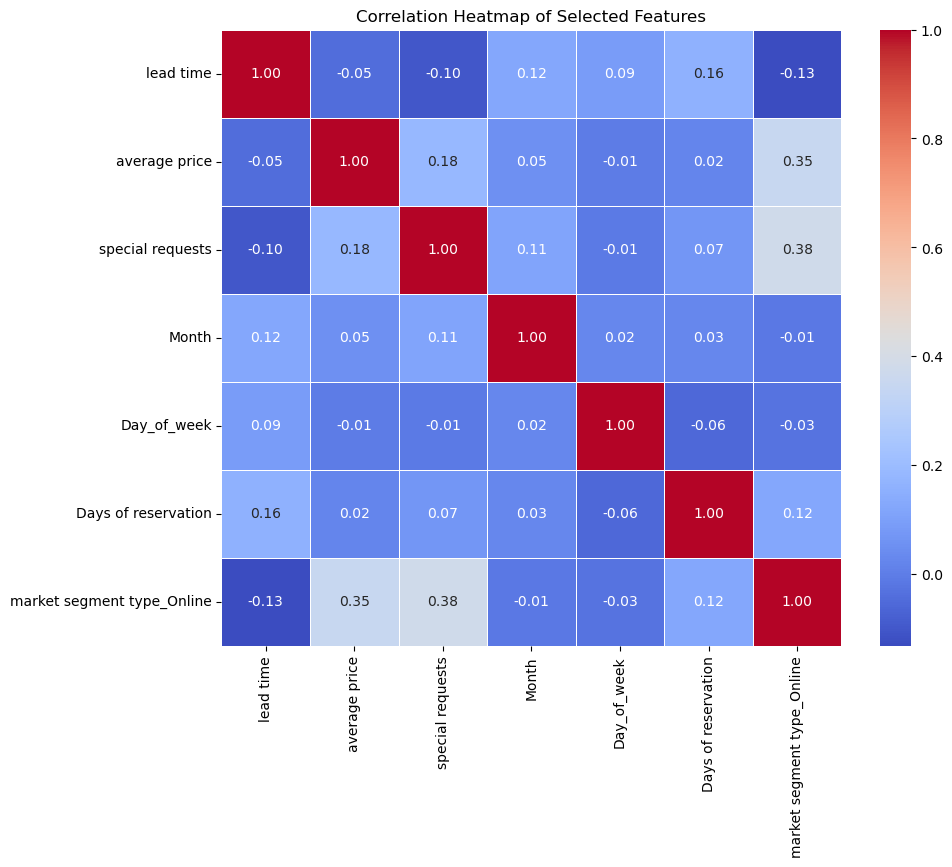

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [104]:
X=df[selected_feature_names]
y=df['booking status']

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [106]:
# correlation_matrix = df.corr()

# plt.figure(figsize=(20, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# plt.title('Correlation Heatmap')
# plt.show()

In [107]:
# def forword_selection(data,target,sig_level=0.05):
#     init_features=data.columns.tolist()
#     best_features=[]
#     while(len(init_features)>0):
#         remaning_feature=list(set(init_features)-set(best_features))
#         new_pval=pd.Series(index=remaning_feature)
#         for new_column in remaning_feature:
#             model=sm.OLS(target,sm.add_constant(data[best_features+[new_column]])).fit()
#             new_pval[new_column]=model.pvalues[new_column]
#             min_p_value=new_pval.min()
#             if(min_p_value<sig_level):
#                 best_features.append(new_pval.idxmin())
#             else:
#                 break
#     return best_features   

# =========================================================

# Modeling and Tuning 

### Before Tunning 

#### LogisticRegression

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)


a_Logistic_Regression = round(accuracy_score(y_test, y_pred) * 100,2)
f_Logistic_Regression = round(f1_score(y_test, y_pred) * 100,2) 
p_Logistic_Regression = round(precision_score(y_test, y_pred) * 100,2) 
r_Logistic_Regression = round(recall_score(y_test, y_pred) * 100,2) 

train_accuracy = round(accuracy_score(y_train, logreg.predict(X_train)*100),2)

print("Accuracy of Logistic Regression:", a_Logistic_Regression)
print("F1 Score of Logistic Regression:", f_Logistic_Regression)
print("Precision of Logistic Regression:", p_Logistic_Regression)
print("Recall of Logistic Regression:", r_Logistic_Regression)
print("Training Accuracy:", train_accuracy)


Accuracy of Logistic Regression: 80.35
F1 Score of Logistic Regression: 66.17
Precision of Logistic Regression: 73.6
Recall of Logistic Regression: 60.1
Training Accuracy: 0.6


#### DecisionTreeClassifier

In [109]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
a_Decision_Tree = round(accuracy_score(y_test, y_pred) * 100,2)
f_Decision_Tree = round(f1_score(y_test, y_pred) * 100,2) 
p_Decision_Tree = round(precision_score(y_test, y_pred) * 100,2) 
r_Decision_Tree = round(recall_score(y_test, y_pred) * 100,2)
train_accuracy = round(accuracy_score(y_train, dt.predict(X_train)*100),2)



print("Accuracy of Decision Tree:", a_Decision_Tree)
print("F1 Score of Decision Tree:", f_Decision_Tree)
print("Precision of Decision Tree:", p_Decision_Tree)
print("Recall of Decision Tree:", r_Decision_Tree)
print("Training Accuracy:", train_accuracy)

Accuracy of Decision Tree: 82.13
F1 Score of Decision Tree: 71.0
Precision of Decision Tree: 73.74
Recall of Decision Tree: 68.46
Training Accuracy: 0.6


#### RandomForestClassifier

In [110]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
a_random_forest = round(accuracy_score(y_test, y_pred) * 100,2)
f_random_forest = round(f1_score(y_test, y_pred) * 100,2) 
p_random_forest = round(precision_score(y_test, y_pred) * 100,2) 
r_random_forest = round(recall_score(y_test, y_pred) * 100,2)
train_accuracy =round(accuracy_score(y_train, rf.predict(X_train)*100),2)


print("Training Accuracy:", train_accuracy)
print("Accuracy of Random Forest:", a_random_forest)
print("F1 Score of Random Forest:", f_random_forest)
print("Precision of Random Forest:", p_random_forest)
print("Recall of Random Forest:", r_random_forest)

Training Accuracy: 0.65
Accuracy of Random Forest: 82.82
F1 Score of Random Forest: 67.89
Precision of Random Forest: 84.28
Recall of Random Forest: 56.84


#### KNeighborsClassifier

In [111]:
st=StandardScaler()
scaled_train=st.fit_transform(X_train)
scaled_test=st.transform(X_test)


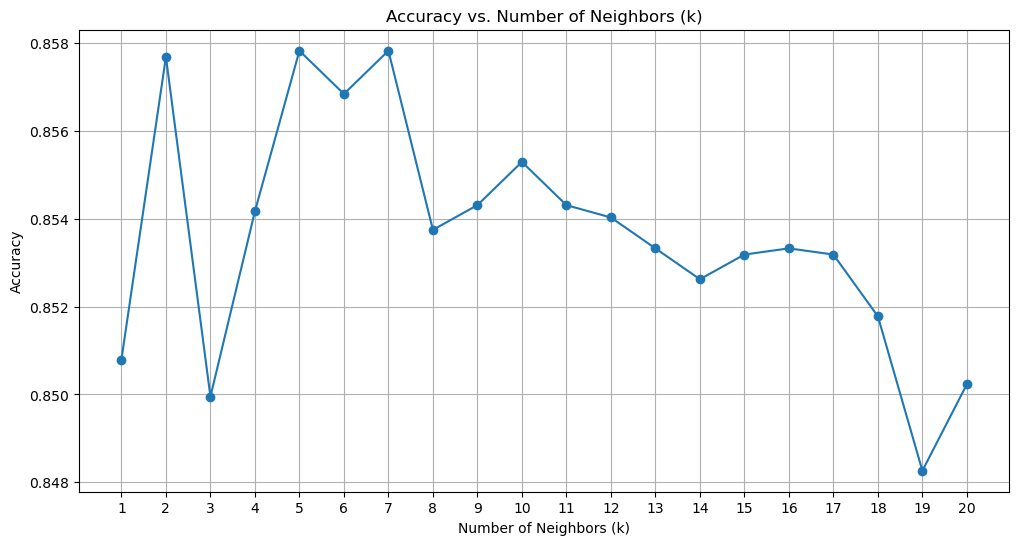

Best k: 5


In [112]:
k_values = range(1, 21) 
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_train, y_train)
    accuracy = knn.score(scaled_test, y_test)
    accuracies.append(accuracy)
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k_index = np.argmax(accuracies)

best_k = k_values[best_k_index]

print("Best k:", best_k)


In [113]:
k = KNeighborsClassifier(n_neighbors=best_k)
k.fit(scaled_train,y_train)
y_pred = k.predict(scaled_test)

a_k_neighbors = round(accuracy_score(y_test, y_pred) * 100,2)
f_k_neighbors = round(f1_score(y_test, y_pred) * 100,2) 
p_k_neighbors = round(precision_score(y_test, y_pred) * 100,2) 
r_k_neighbors = round(recall_score(y_test, y_pred) * 100,2)
train_accuracy = round(accuracy_score(y_train, k.predict(scaled_train)*100),2)


print("Accuracy of K-Nearest Neighbors:", a_k_neighbors)
print("F1 Score of K-Nearest Neighbors:", f_k_neighbors)
print("Precision of K-Nearest Neighbors:", p_k_neighbors)
print("Recall of K-Nearest Neighbors:", r_k_neighbors)
print("Training Accuracy:", train_accuracy)

Accuracy of K-Nearest Neighbors: 85.78
F1 Score of K-Nearest Neighbors: 76.91
Precision of K-Nearest Neighbors: 79.96
Recall of K-Nearest Neighbors: 74.09
Training Accuracy: 0.64


#### GradientBoostingClassifier

In [114]:
gbt = GradientBoostingClassifier(n_estimators = 150,max_depth=5)
gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)

train_accuracy = round(accuracy_score(y_train,gbt.predict(X_train)*100),2)
a_Gradient_Boosting = round(accuracy_score(y_test, y_pred) * 100,2)
f_Gradient_Boosting = round(f1_score(y_test, y_pred) * 100,2) 
p_Gradient_Boosting = round(precision_score(y_test, y_pred) * 100,2) 
r_Gradient_Boosting = round(recall_score(y_test, y_pred) * 100,2)

print("Accuracy of Gradient Boosting:", a_Gradient_Boosting)
print("F1 Score of Gradient Boosting:", f_Gradient_Boosting)
print("Precision of Gradient Boosting:", p_Gradient_Boosting)
print("Recall of Gradient Boosting:", r_Gradient_Boosting)
print("Training Accuracy:", train_accuracy)

Accuracy of Gradient Boosting: 87.65
F1 Score of Gradient Boosting: 79.54
Precision of Gradient Boosting: 84.55
Recall of Gradient Boosting: 75.1
Training Accuracy: 0.64


#### MultinomialNB

In [115]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


train_accuracy =round(accuracy_score(y_train,clf.predict(X_train)*100),2)
a_Naive_Bayes = round(accuracy_score(y_test, y_pred) * 100,2)
f_Naive_Bayes = round(f1_score(y_test, y_pred) * 100,2) 
p_Naive_Bayes = round(precision_score(y_test, y_pred) * 100,2)
r_Naive_Bayes = round(recall_score(y_test, y_pred) * 100,2) 


print("Accuracy of Naive Bayes:", a_Naive_Bayes)
print("F1 Score of Naive Bayes:", f_Naive_Bayes)
print("Precision of Naive Bayes:", p_Naive_Bayes)
print("Recall of Naive Bayes:", r_Naive_Bayes)
print("Training Accuracy:", train_accuracy)

Accuracy of Naive Bayes: 71.16
F1 Score of Naive Bayes: 57.98
Precision of Naive Bayes: 54.26
Recall of Naive Bayes: 62.25
Training Accuracy: 0.51


#### SGD

In [116]:
sv = SGDClassifier()
sv.fit(scaled_train, y_train)
y_pred = sv.predict(scaled_test)

train_accuracy =round(accuracy_score(y_train,sv.predict(scaled_train)*100),2)
a_SGD = round(accuracy_score(y_test, y_pred) * 100,2)
f_SGD = round(f1_score(y_test, y_pred) * 100,2) 
p_SGD = round(precision_score(y_test, y_pred) * 100,2) 
r_SGD = round(recall_score(y_test, y_pred) * 100,2) 

print("Accuracy of SGD:", a_SGD)
print("F1 Score of SGD:", f_SGD)
print("Precision of SGD:", p_SGD)
print("Recall of SGD:", r_SGD)
print("Training Accuracy:", train_accuracy)

Accuracy of SGD: 80.12
F1 Score of SGD: 63.95
Precision of SGD: 76.05
Recall of SGD: 55.17
Training Accuracy: 0.62


### XGB

In [117]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',  # Evaluation metric
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Maximum tree depth
    learning_rate=0.3,  # Learning rate
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42
)

model.fit(X_train, y_train)


train_accuracy =round(accuracy_score(y_train,sv.predict(X_train)*100),2)
a_xgb = round(accuracy_score(y_test, y_pred) * 100,2)
f_xgb = round(f1_score(y_test, y_pred) * 100,2) 
p_xgb = round(precision_score(y_test, y_pred) * 100,2) 
r_xgb = round(recall_score(y_test, y_pred) * 100,2) 

print("Accuracy of XGB:", a_xgb)
print("F1 Score of XGB:", f_xgb)
print("Precision of XGB:", p_xgb)
print("Recall of XGB:", r_xgb)
print("Training Accuracy:", train_accuracy)

Accuracy of XGB: 80.12
F1 Score of XGB: 63.95
Precision of XGB: 76.05
Recall of XGB: 55.17
Training Accuracy: 0.01


### Ada Boost 

In [118]:

base_estimator = DecisionTreeClassifier(max_depth=1)  
n_estimators = 50 
learning_rate = 1.0

ada_boost_clf = AdaBoostClassifier(base_estimator=base_estimator,
                                    n_estimators=n_estimators,
                                    learning_rate=learning_rate,
                                    random_state=42)


ada_boost_clf.fit(X_train, y_train)

train_accuracy =round(accuracy_score(y_train,clf.predict(X_train)*100),2)
a_ada_boost = round(accuracy_score(y_test, y_pred) * 100,2)
f_ada_boost = round(f1_score(y_test, y_pred) * 100,2) 
p_ada_boost= round(precision_score(y_test, y_pred) * 100,2)
r_ada_boost = round(recall_score(y_test, y_pred) * 100,2) 
print("Accuracy of ada_boost:", a_ada_boost)
print("F1 Score of ada_boost:", f_ada_boost)
print("Precision of ada_boost:", p_ada_boost)
print("Recall of ada_boost:", r_ada_boost)
print("Training Accuracy:", train_accuracy)


Accuracy of ada_boost: 80.12
F1 Score of ada_boost: 63.95
Precision of ada_boost: 76.05
Recall of ada_boost: 55.17
Training Accuracy: 0.51


In [119]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','Stochastic Gradient Descent (SGD)','K-Nearest Neighbors','Decision Tree','Logistic Regression','Naive Bayes','XGBClassifier','AdaBoostClassifier'],
    'Accuracy': [a_Gradient_Boosting, a_random_forest, a_SGD, a_k_neighbors, a_Decision_Tree, a_Logistic_Regression, a_Naive_Bayes,a_xgb,a_ada_boost],
    'F1-Score': [f_Gradient_Boosting, f_random_forest, f_SGD, f_k_neighbors, f_Decision_Tree, f_Logistic_Regression, f_Naive_Bayes,f_xgb ,f_ada_boost],
    'Precision': [p_Gradient_Boosting, p_random_forest, p_SGD, p_k_neighbors, p_Decision_Tree, p_Logistic_Regression, p_Naive_Bayes,p_xgb ,p_ada_boost],
    'Recall': [r_Gradient_Boosting, r_random_forest, r_SGD, r_k_neighbors, r_Decision_Tree, r_Logistic_Regression, r_Naive_Bayes, r_xgb,r_ada_boost]
             })

sorted_model=models.sort_values(by='Accuracy', ascending=False)
sorted_model

,Model,Accuracy,F1-Score,Precision,Recall
0,Gradient Boosting,87.65,79.54,84.55,75.10
3,K-Nearest Neighbors,85.78,76.91,79.96,74.09
1,Random Forest,82.82,67.89,84.28,56.84
4,Decision Tree,82.13,71.00,73.74,68.46
5,Logistic Regression,80.35,66.17,73.60,60.10
2,Stochastic Gradient Descent (SGD),80.12,63.95,76.05,55.17
7,XGBClassifier,80.12,63.95,76.05,55.17
8,AdaBoostClassifier,80.12,63.95,76.05,55.17
6,Naive Bayes,71.16,57.98,54.26,62.25


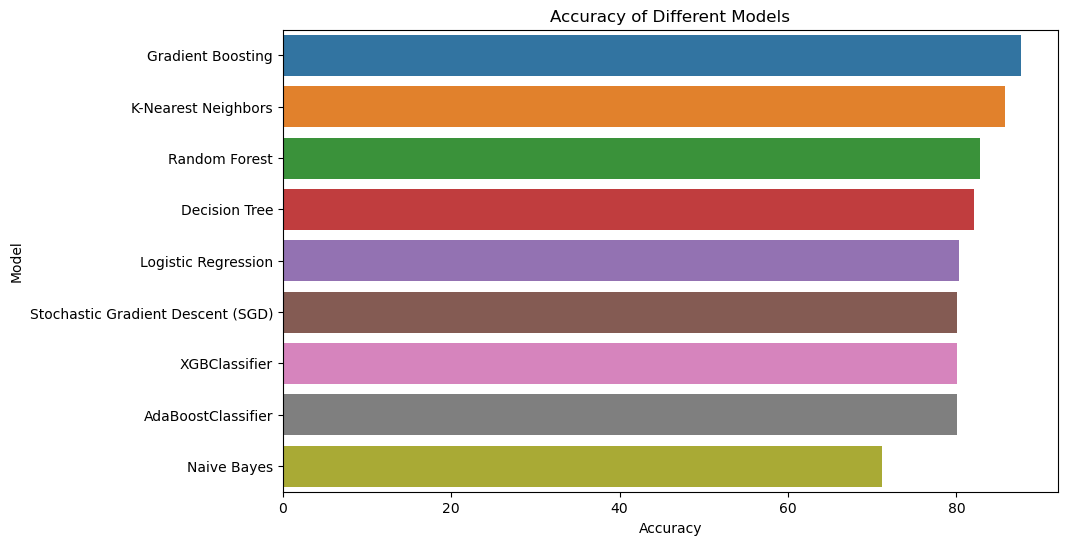

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=models, order=sorted_model['Model'])
plt.title('Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

## Lets do Some Tuning 

####  LogisticRegression

In [121]:
param_grid = {"C": [0.1, 0.2, 0.5]}

lg=LogisticRegression()

grid_lg=GridSearchCV(estimator=lg,param_grid=param_grid,scoring='accuracy',n_jobs=4,cv=5,refit=True,return_train_score=True)

grid_lg.fit(X_train,y_train)

y_pred=grid_lg.predict(X_test)

### Grid Search propertty 
cv_results_df=pd.DataFrame(grid_lg.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {grid_lg.best_params_}")

pd.set_option("display.max_colwidth",None)
print(cv_results_df.loc[:,"params"])


cv_results = grid_lg.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[grid_lg.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row


Shape Of Cv : (3, 21)
best params is : {'C': 0.2}
0    {'C': 0.1}
1    {'C': 0.2}
2    {'C': 0.5}
Name: params, dtype: object
Mean Test Score for Best Parameters: 0.7967938163292398


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.198668,0.017505,0.00382,0.000227,0.2,{'C': 0.2},0.801723,0.797504,0.791879,0.792758,...,0.796794,0.003904,1,0.79833,0.796089,0.797012,0.795298,0.798471,0.79704,0.001237


In [122]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_lg=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_lg}")

pre_lg=precision_score(y_test,y_pred)
print(f"precision_score: {pre_lg}")

rec_lg=recall_score(y_test,y_pred)
print(f"recall_score: {rec_lg}")

f1_lg=f1_score(y_test,y_pred)
print(f"f1_score: {f1_lg}")

confusion_matrix: [[4342  496]
 [ 934 1339]]
accuracy_score: 0.7989031078610603
precision_score: 0.729700272479564
recall_score: 0.589089309282886
f1_score: 0.6518987341772152


In [123]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191934,0.014809,0.003911,0.000594,0.1,{'C': 0.1},0.791703,0.786782,0.791528,0.785375,...,0.789727,0.003071,2,0.791914,0.784707,0.795649,0.785410,0.795834,0.790703,0.004821
1,0.198668,0.017505,0.003820,0.000227,0.2,{'C': 0.2},0.801723,0.797504,0.791879,0.792758,...,0.796794,0.003904,1,0.798330,0.796089,0.797012,0.795298,0.798471,0.797040,0.001237
2,0.193083,0.011689,0.003851,0.001710,0.5,{'C': 0.5},0.787309,0.798910,0.779047,0.792231,...,0.789446,0.006482,3,0.784311,0.794682,0.786025,0.791518,0.793110,0.789929,0.004051


In [124]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

### DTree 

In [125]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'random_state': [42]  
}

dt = DecisionTreeClassifier()

number_models=10

random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)

random_search_dt.fit(X_train, y_train)

y_pred=random_search_dt.predict(X_test)

cv_results_df=pd.DataFrame(random_search_dt.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_dt.best_params_}")




cv_results = random_search_dt.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_dt.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row





Shape Of Cv : (10, 37)
best params is : {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}
Mean Test Score for Best Parameters: 0.8610953779300423


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
9,0.035772,0.004995,0.004274,0.001593,42,2,2,None,auto,20,...,0.923591,0.920114,0.923945,0.925898,0.924531,0.928477,0.929141,0.923164,0.924886,0.002495


In [126]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}"
1,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}"
2,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}"
3,"{'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 5, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}"
4,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}"
5,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}"
6,"{'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}"
7,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}"
8,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}"
9,"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}"


In [127]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_dt=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_dt}")

pre_dt=precision_score(y_test,y_pred)
print(f"precision_score: {pre_dt}")

rec_dt=recall_score(y_test,y_pred)
print(f"recall_score: {rec_dt}")

f1_dt=f1_score(y_test,y_pred)
print(f"f1_score: {f1_dt}")

confusion_matrix: [[4408  430]
 [ 574 1699]]
accuracy_score: 0.8588102939108424
precision_score: 0.7980272428370127
recall_score: 0.7474703035635724
f1_score: 0.7719218537028624


### RandomForestClassifier

In [128]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],             
    'criterion': ['gini', 'entropy'],           
    'max_depth': [None, 10, 20, 30],              
    'min_samples_split': [2, 5, 10],              
    'min_samples_leaf': [1, 2, 4],                
    'max_features': ['auto', 'sqrt', 'log2'],     
    'max_leaf_nodes': [None, 5, 10, 20],         
    'bootstrap': [True, False],                   
    'random_state': [42]                          
}
number_models=10

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)
random_search_rf.fit(X_train, y_train)
y_pred=random_search_rf.predict(X_test)


cv_results_df=pd.DataFrame(random_search_rf.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_rf.best_params_}")




cv_results = random_search_rf.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_rf.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row



Shape Of Cv : (10, 39)
best params is : {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
Mean Test Score for Best Parameters: 0.8937557315496626


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,7.813523,0.315164,0.185963,0.031954,42,200,2,2,None,sqrt,...,0.988906,0.988945,0.988984,0.989492,0.989609,0.989414,0.989453,0.989766,0.989187,0.000387


In [129]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}"
1,"{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}"
2,"{'random_state': 42, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 5, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}"
3,"{'random_state': 42, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}"
4,"{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}"
5,"{'random_state': 42, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}"
6,"{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}"
7,"{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}"
8,"{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}"
9,"{'random_state': 42, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}"


In [130]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_rf=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_rf}")

pre_rf=precision_score(y_test,y_pred)
print(f"precision_score: {pre_rf}")

rec_rf=recall_score(y_test,y_pred)
print(f"recall_score: {rec_rf}")

f1_rf=f1_score(y_test,y_pred)
print(f"f1_score: {f1_rf}")

confusion_matrix: [[4563  275]
 [ 471 1802]]
accuracy_score: 0.8950921108142315
precision_score: 0.8675974963890226
recall_score: 0.7927848658161021
f1_score: 0.8285057471264368


### KNN

In [131]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 21),   
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size': [10, 20, 30],      # Leaf size for ball_tree or kd_tree    
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] 
}


number_models=10
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)
random_search_knn.fit(scaled_train, y_train)
y_pred = random_search_knn.predict(scaled_test)




cv_results_df=pd.DataFrame(random_search_knn.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_knn.best_params_}")




cv_results = random_search_knn.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_knn.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row


Shape Of Cv : (10, 35)
best params is : {'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}
Mean Test Score for Best Parameters: 0.878567996262597


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_metric,param_leaf_size,param_algorithm,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.066616,0.011022,0.131072,0.018791,distance,10,manhattan,10,auto,"{'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}",...,0.993984,0.993633,0.993984,0.994062,0.993828,0.993906,0.993984,0.99418,0.993871,0.000203


In [132]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'weights': 'uniform', 'n_neighbors': 13, 'metric': 'euclidean', 'leaf_size': 10, 'algorithm': 'ball_tree'}"
1,"{'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}"
2,"{'weights': 'distance', 'n_neighbors': 2, 'metric': 'chebyshev', 'leaf_size': 10, 'algorithm': 'auto'}"
3,"{'weights': 'uniform', 'n_neighbors': 6, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'ball_tree'}"
4,"{'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean', 'leaf_size': 20, 'algorithm': 'ball_tree'}"
5,"{'weights': 'uniform', 'n_neighbors': 18, 'metric': 'chebyshev', 'leaf_size': 10, 'algorithm': 'auto'}"
6,"{'weights': 'uniform', 'n_neighbors': 14, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'kd_tree'}"
7,"{'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean', 'leaf_size': 10, 'algorithm': 'kd_tree'}"
8,"{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'kd_tree'}"
9,"{'weights': 'uniform', 'n_neighbors': 4, 'metric': 'minkowski', 'leaf_size': 10, 'algorithm': 'ball_tree'}"


In [133]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_knn=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_knn}")

pre_knn=precision_score(y_test,y_pred)
print(f"precision_score: {pre_knn}")

rec_knn=recall_score(y_test,y_pred)
print(f"recall_score: {rec_knn}")

f1_knn=f1_score(y_test,y_pred)
print(f"f1_score: {f1_knn}")

confusion_matrix: [[4474  364]
 [ 501 1772]]
accuracy_score: 0.8783574743355365
precision_score: 0.8295880149812734
recall_score: 0.7795864496260448
f1_score: 0.8038103878430484


### GradientBoostingClassifier

In [134]:
gbt = GradientBoostingClassifier()
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

number_models=10
random_search_gbt = RandomizedSearchCV(estimator=gbt, param_distributions=param_grid_gb, n_iter=number_models, cv=10, scoring='accuracy', refit=True,return_train_score=True)
random_search_gbt.fit(X_train, y_train)
y_pred = random_search_gbt.predict(X_test)




In [135]:
cv_results_df=pd.DataFrame(random_search_gbt.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_gbt.best_params_}")




cv_results = random_search_gbt.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_gbt.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 36)
best params is : {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}
Mean Test Score for Best Parameters: 0.8821892604045394


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_learning_rate,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,5.710015,0.108115,0.017566,0.006181,0.8,200,2,1,5,0.2,...,0.920895,0.919489,0.923906,0.923789,0.923203,0.923984,0.924531,0.921523,0.92246,0.001636


In [136]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 4, 'learning_rate': 0.2}"
1,"{'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.05}"
2,"{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.05}"
3,"{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}"
4,"{'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.2}"
5,"{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.1}"
6,"{'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}"
7,"{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.2}"
8,"{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.05}"
9,"{'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05}"


In [137]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_gbt=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_gbt}")

pre_gbt=precision_score(y_test,y_pred)
print(f"precision_score: {pre_gbt}")

rec_gbt=recall_score(y_test,y_pred)
print(f"recall_score: {rec_gbt}")

f1_gbt=f1_score(y_test,y_pred)
print(f"f1_score: {f1_gbt}")

confusion_matrix: [[4523  315]
 [ 498 1775]]
accuracy_score: 0.8856700885951343
precision_score: 0.8492822966507177
recall_score: 0.7809062912450506
f1_score: 0.8136603254641301


#### GaussianNB

In [138]:

MNB = MultinomialNB()

param_grid_mnb = {
    'alpha': [0.1, 0.5, 1.0],
}

number_models = 10

random_search_MNB = RandomizedSearchCV(estimator=MNB, param_distributions=param_grid_mnb, 
                                       n_iter=number_models, cv=10, scoring='accuracy', 
                                       refit=True, return_train_score=True)
random_search_MNB.fit(X_train, y_train)
y_pred = random_search_MNB.predict(X_test)


In [139]:
cv_results_df=pd.DataFrame(random_search_MNB.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_MNB.best_params_}")




cv_results = random_search_MNB.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_MNB.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (3, 31)
best params is : {'alpha': 0.1}
Mean Test Score for Best Parameters: 0.6986708489985392


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009628,0.001365,0.002775,0.000652,0.1,{'alpha': 0.1},0.699473,0.697012,0.709315,0.695255,...,0.697137,0.69866,0.699102,0.699023,0.698945,0.699336,0.7,0.698945,0.698945,0.000704
1,0.010743,0.001977,0.002831,0.000618,0.5,{'alpha': 0.5},0.699473,0.697012,0.709315,0.695255,...,0.697137,0.69866,0.699102,0.699023,0.698945,0.699336,0.7,0.698945,0.698945,0.000704
2,0.009852,0.000817,0.002684,0.000687,1.0,{'alpha': 1.0},0.699473,0.697012,0.709315,0.695255,...,0.697137,0.69866,0.699102,0.699023,0.698945,0.699336,0.7,0.698945,0.698945,0.000704


In [140]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,{'alpha': 0.1}
1,{'alpha': 0.5}
2,{'alpha': 1.0}


In [141]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_NB=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_NB}")

pre_NB=precision_score(y_test,y_pred)
print(f"precision_score: {pre_NB}")

rec_NB=recall_score(y_test,y_pred)
print(f"recall_score: {rec_NB}")

f1_NB=f1_score(y_test,y_pred)
print(f"f1_score: {f1_NB}")

confusion_matrix: [[3645 1193]
 [ 858 1415]]
accuracy_score: 0.7115736183377865
precision_score: 0.5425613496932515
recall_score: 0.6225252969643643
f1_score: 0.57979922147101


   ### SGD

In [142]:
svc=SGDClassifier()
param_distributions = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1'],
    'alpha': loguniform(1e-6, 1e0),  # Log-uniform distribution for alpha
    'max_iter': [1000, 2000, 3000],
    'tol': loguniform(1e-5, 1e-2),  # Log-uniform distribution for tolerance
    'shuffle': [True, False],
    'random_state': [42]
}

random_search_Svc = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, 
                                       n_iter=number_models, cv=10, scoring='accuracy', 
                                       refit=True, return_train_score=True)
random_search_Svc.fit(scaled_train,y_train)
y_pred = random_search_Svc.predict(scaled_test)

In [143]:
cv_results_df=pd.DataFrame(random_search_Svc.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_Svc.best_params_}")




cv_results = random_search_Svc.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_Svc.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 37)
best params is : {'alpha': 0.00022558436557854156, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'shuffle': False, 'tol': 7.258593324390447e-05}
Mean Test Score for Best Parameters: 0.7972854762840524


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_max_iter,param_penalty,param_random_state,param_shuffle,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
5,0.087314,0.010841,0.001297,0.000429,0.000226,hinge,1000,l2,42,False,...,0.798312,0.797219,0.797617,0.797539,0.796992,0.798867,0.798516,0.794531,0.797387,0.001134


In [144]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'alpha': 0.32690656600906004, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.000482163025418018}"
1,"{'alpha': 0.04502189169955872, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42, 'shuffle': False, 'tol': 0.00958766127822636}"
2,"{'alpha': 0.21250028415687064, 'loss': 'log', 'max_iter': 2000, 'penalty': 'l1', 'random_state': 42, 'shuffle': False, 'tol': 0.00014276743074544503}"
3,"{'alpha': 0.07649300216750972, 'loss': 'modified_huber', 'max_iter': 2000, 'penalty': 'l1', 'random_state': 42, 'shuffle': True, 'tol': 5.472465171492342e-05}"
4,"{'alpha': 2.7429123841702668e-05, 'loss': 'hinge', 'max_iter': 3000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.0041941369639636695}"
5,"{'alpha': 0.00022558436557854156, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'shuffle': False, 'tol': 7.258593324390447e-05}"
6,"{'alpha': 0.0002403893924604521, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42, 'shuffle': True, 'tol': 0.0022291389409868478}"
7,"{'alpha': 0.000891951199978271, 'loss': 'modified_huber', 'max_iter': 2000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.0002781205290399038}"
8,"{'alpha': 0.3679590457950066, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42, 'shuffle': False, 'tol': 1.5230316156621365e-05}"
9,"{'alpha': 0.5055228525971122, 'loss': 'log', 'max_iter': 3000, 'penalty': 'l2', 'random_state': 42, 'shuffle': True, 'tol': 0.00014705805946629648}"


In [145]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_sgd=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_sgd}")

pre_sgd=precision_score(y_test,y_pred)
print(f"precision_score: {pre_sgd}")

rec_sgd=recall_score(y_test,y_pred)
print(f"recall_score: {rec_sgd}")

f1_sgd=f1_score(y_test,y_pred)
print(f"f1_score: {f1_sgd}")

confusion_matrix: [[4417  421]
 [ 935 1338]]
accuracy_score: 0.8093095204612573
precision_score: 0.7606594656054576
recall_score: 0.5886493620765508
f1_score: 0.6636904761904762


### XGB

In [146]:
xgb_c=xgb.XGBClassifier(objective='binary:logistic')
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_c, param_distributions=param_grid, 
                                       n_iter=number_models, cv=10, scoring='accuracy', 
                                       refit=True, return_train_score=True)

random_search_xgb.fit(X_train,y_train)
y_pred = random_search_xgb.predict(X_test)

In [147]:
cv_results_df=pd.DataFrame(random_search_xgb.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_xgb.best_params_}")




cv_results = random_search_xgb.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_xgb.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 35)
best params is : {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Mean Test Score for Best Parameters: 0.8841228844247688


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
7,0.307303,0.026903,0.009004,0.000867,0.6,100,9,0.1,1.0,"{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}",...,0.918239,0.918903,0.918672,0.920469,0.918633,0.918594,0.921445,0.919961,0.919479,0.001059


In [148]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.001, 'colsample_bytree': 1.0}"
1,"{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.001, 'colsample_bytree': 0.8}"
2,"{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}"
3,"{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.001, 'colsample_bytree': 1.0}"
4,"{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.001, 'colsample_bytree': 0.6}"
5,"{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.8}"
6,"{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.001, 'colsample_bytree': 1.0}"
7,"{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}"
8,"{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}"
9,"{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.6}"


In [149]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_xgb=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_xgb}")

pre_xgb=precision_score(y_test,y_pred)
print(f"precision_score: {pre_xgb}")

rec_xgb=recall_score(y_test,y_pred)
print(f"recall_score: {rec_xgb}")

f1_xgb=f1_score(y_test,y_pred)
print(f"f1_score: {f1_xgb}")

confusion_matrix: [[4548  290]
 [ 500 1773]]
accuracy_score: 0.8889045141330333
precision_score: 0.859428017450315
recall_score: 0.7800263968323801
f1_score: 0.8178044280442806


### AdaBoost


In [150]:
adaboost=AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

random_search_adaboost = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, 
                                       n_iter=number_models, cv=10, scoring='accuracy', 
                                       refit=True, return_train_score=True)

random_search_adaboost.fit(X_train,y_train)
y_pred = random_search_adaboost.predict(X_test)



In [151]:
cv_results_df=pd.DataFrame(random_search_adaboost.cv_results_)

print(f"Shape Of Cv : {cv_results_df.shape}")
print(f"best params is : {random_search_adaboost.best_params_}")




cv_results = random_search_adaboost.cv_results_
mean_test_scores = cv_results['mean_test_score']
print(f"Mean Test Score for Best Parameters: {mean_test_scores[random_search_adaboost.best_index_]}")


best_row=cv_results_df[cv_results_df['rank_test_score']==1]
best_row

Shape Of Cv : (10, 33)
best params is : {'n_estimators': 150, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Mean Test Score for Best Parameters: 0.8210868995622395


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_algorithm,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,2.939266,3.152134,0.060071,0.009314,150,1.0,SAMME.R,"{'n_estimators': 150, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}",0.821441,0.817575,...,0.823704,0.823352,0.823594,0.825352,0.823281,0.823867,0.823828,0.822969,0.82363,0.000683


In [152]:
pd.set_option("display.max_colwidth",None)
pd.DataFrame(cv_results_df.loc[:,"params"])

,params
0,"{'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME'}"
1,"{'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}"
2,"{'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME'}"
3,"{'n_estimators': 150, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}"
4,"{'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME'}"
5,"{'n_estimators': 150, 'learning_rate': 0.1, 'algorithm': 'SAMME'}"
6,"{'n_estimators': 150, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}"
7,"{'n_estimators': 150, 'learning_rate': 0.5, 'algorithm': 'SAMME'}"
8,"{'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}"
9,"{'n_estimators': 50, 'learning_rate': 0.5, 'algorithm': 'SAMME'}"


In [153]:
### Matrics 
cm=confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: {cm}")

acc_ada=accuracy_score(y_test,y_pred)
print(f"accuracy_score: {acc_ada}")

pre_ada=precision_score(y_test,y_pred)
print(f"precision_score: {pre_ada}")

rec_ada=recall_score(y_test,y_pred)
print(f"recall_score: {rec_ada}")

f1_ada=f1_score(y_test,y_pred)
print(f"f1_score: {f1_ada}")

confusion_matrix: [[4313  525]
 [ 729 1544]]
accuracy_score: 0.8236534945858529
precision_score: 0.7462542290961818
recall_score: 0.6792784865816102
f1_score: 0.7111929986181483


In [154]:
scores_dict = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'Naive Bayes', 'SGD','XGB','AdaBoosting'],
    'Accuracy': [acc_lg, acc_dt, acc_rf, acc_knn, acc_gbt, acc_NB, acc_sgd,acc_xgb,acc_ada],
    'Precision': [pre_lg, pre_dt, pre_rf, pre_knn, pre_gbt, pre_NB, pre_sgd,pre_xgb,pre_ada],
    'Recall': [rec_lg, rec_dt, rec_rf, rec_knn, rec_gbt, rec_NB, rec_sgd,rec_xgb,rec_ada],
    'F1 Score': [f1_lg, f1_dt, f1_rf, f1_knn, f1_gbt, f1_NB, f1_sgd,f1_xgb,f1_ada]
}


scores_df = pd.DataFrame(scores_dict)

df_sorted=scores_df.sort_values(by='Accuracy', ascending=False)

df_sorted

,Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,0.895092,0.867597,0.792785,0.828506
7,XGB,0.888905,0.859428,0.780026,0.817804
4,Gradient Boosting,0.885670,0.849282,0.780906,0.813660
3,KNN,0.878357,0.829588,0.779586,0.803810
1,Decision Tree,0.858810,0.798027,0.747470,0.771922
8,AdaBoosting,0.823653,0.746254,0.679278,0.711193
6,SGD,0.809310,0.760659,0.588649,0.663690
0,Logistic Regression,0.798903,0.729700,0.589089,0.651899
5,Naive Bayes,0.711574,0.542561,0.622525,0.579799


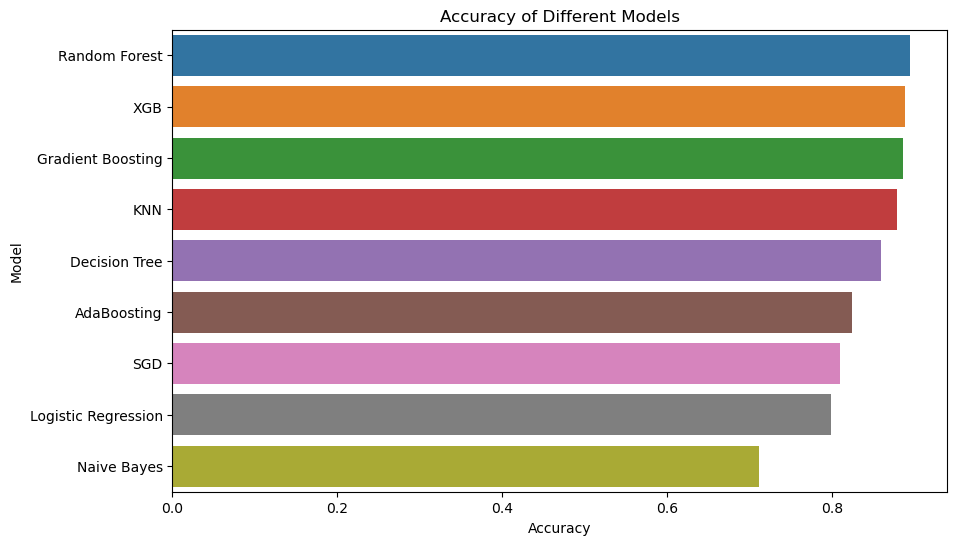

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=scores_df, order=df_sorted['Model'])
plt.title('Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

In [156]:
pickle.dump(random_search_rf,open('Random_model.pkl','wb'))

####  Another way Of Tuning 

In [157]:
# metric = input("Choose the evaluation metric (accuracy, precision, recall, f1, mse): ")
# param_grid = {
#     "Decision Tree": {"max_depth": [1, 2, 3, 4, 5]},
#     "Random Forest": {"n_estimators": [50, 100, 150], "max_depth": [1, 2, 3, 4, 5]},
#     "Logistic Regression": {"C": [0.1, 1, 10]},
#     "Gradient Boosting": {"n_estimators": [50, 100, 150], "max_depth": [1, 2, 3, 4, 5]},
#     "KNN": {"n_neighbors": [3, 5, 7, 9]},
#     "Naive Bayes": {"alpha": [0.1, 1, 10]}
# }
# models = {
#     "Decision Tree": GridSearchCV(DecisionTreeClassifier(), param_grid["Decision Tree"], scoring=metric),
#     "Random Forest": RandomizedSearchCV(RandomForestClassifier(), param_grid["Random Forest"], scoring=metric, n_iter=10),
#     "Logistic Regression": GridSearchCV(LogisticRegression(), param_grid["Logistic Regression"], scoring=metric),
#     "Gradient Boosting": RandomizedSearchCV(GradientBoostingClassifier(), param_grid["Gradient Boosting"], scoring=metric, n_iter=10),
#     "KNN": GridSearchCV(KNeighborsClassifier(), param_grid["KNN"], scoring=metric),
#     "Naive Bayes": GridSearchCV(GaussianNB(), {}, scoring=metric)
# }

# for model_name,model in models.items():
#     model.fit(X_train, y_train)

    
# best_model = max(models, key=lambda x: models[x].best_score_)
    
    

# y_train_pred = models[best_model].predict(X_train)
# if metric == 'accuracy':
#     train_score = accuracy_score(y_train, y_train_pred)
# elif metric == 'precision':
#     train_score = precision_score(y_train, y_train_pred)
# elif metric == 'recall':
#     train_score = recall_score(y_train, y_train_pred)
# elif metric == 'f1':
#     train_score = f1_score(y_train, y_train_pred)
# elif metric == 'mse':
#     train_score = mean_squared_error(y_train, y_train_pred)


# y_pred = models[best_model].predict(X_test)

# if metric == 'accuracy':
#     score = accuracy_score(y_test, y_pred)
# elif metric == 'precision':
#     score = precision_score(y_test, y_pred)
# elif metric == 'recall':
#     score = recall_score(y_test, y_pred)
# elif metric == 'f1':
#     score = f1_score(y_test, y_pred)
# elif metric == 'mse':
#     score = mean_squared_error(y_test, y_pred)



# print("Best Model:", best_model)
# print("Best Model Hyperparameters:", models[best_model].best_params_)
# print(f"{metric.capitalize()} on Training Set:", train_score)
# print(f"{metric.capitalize()} on Test Set:", score)

# ===========================================================

# Note 

# Forward Selection Algorithm

This function implements the forward selection algorithm for feature selection using Ordinary Least Squares (OLS) regression.

### Parameters:
- `data`: DataFrame containing the predictor variables.
- `target`: Series containing the target variable.
- `sig_level`: Significance level (default is 0.05).

### Returns:
- `best_features`: List of selected features.

```python
import pandas as pd
import statsmodels.api as sm

def forward_selection(data, target, sig_level=0.05):
    """
    Perform forward selection algorithm for feature selection.

    Parameters:
    data : pandas DataFrame
        DataFrame containing the predictor variables.
    target : pandas Series
        Series containing the target variable.
    sig_level : float, optional
        Significance level (default is 0.05).

    Returns:
    best_features : list
        List of selected features.
    """
    # Initialize list of features
    init_features = data.columns.tolist()
    best_features = []

    # Iterate until all features are evaluated
    while len(init_features) > 0:
        remaining_features = list(set(init_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        # Iterate through remaining features
        for new_column in remaining_features:
            # Fit OLS model with current set of features
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            # Get p-value for the new feature
            new_pval[new_column] = model.pvalues[new_column]

        # Select feature with minimum p-value
        min_p_value = new_pval.min()

        # Check if minimum p-value is less than significance level
        if min_p_value < sig_level:
            # Add feature with minimum p-value to selected features
            best_features.append(new_pval.idxmin())
        else:
            # Break the loop if no significant features left
            break

    return best_features


#### Data Overview 

| Column Name           | Explanation                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID            | A unique identifier for each booking.                                                            |
| Number of adults      | The count of adult guests in the booking.                                                        |
| Number of children    | The count of child guests in the booking.                                                        |
| Number of weekend nights | The number of nights during the weekend (typically Friday and Saturday nights).                   |
| Number of week nights | The number of nights during weekdays (Sunday through Thursday nights).                            |
| Type of meal          | The meal plan included in the booking .         |
| Car parking space     | Whether the booking includes a parking space for a car.                                           |
| Room type             | The type of room booked .                                            |
| Lead time             | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date        |
| Market segment type   | The market segment the booking belongs to                       |
| Repeated              | Indicates whether the booking is a repeat booking .            |
| P-C                   | Probability of Cancelation - The likelihood that the booking will be canceled.                   |
| P-not-C               | Probability of Not Cancelation - The likelihood that the booking will not be canceled.           |
| Average price         | The average price per night for the booking.                                                      |
| Special requests      | Any additional requests or requirements made by the guest.                                         |
| Date of reservation   | The date when the booking was made.                                                               |
| Booking status        | The current status of the booking (e.g., confirmed, canceled, pending).                           |


## Supervised Classification Algorithms

Supervised classification is a fundamental machine learning task where a model learns to classify data points into predefined categories based on labeled training examples. The choice of the best classification algorithm depends on several factors like the nature of the data, the number of classes, and computational resources. Here's a brief overview of some common supervised classification algorithms:

**1. Logistic Regression**

* **Description:** Logistic regression is a popular algorithm for **binary classification problems** (where the outcome has only two possible classes). It uses a sigmoid function to map the input data to a probability between 0 and 1, representing the likelihood of belonging to a particular class.

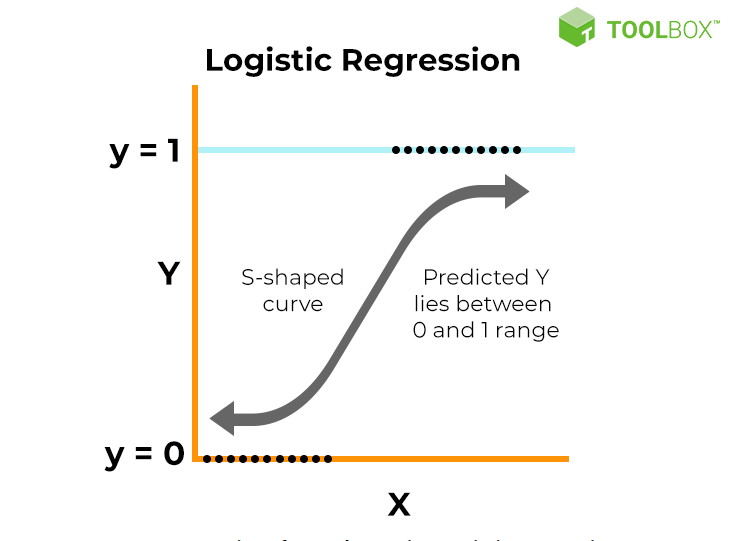

* **Applications:** Logistic regression is widely used in various domains, including spam filtering, sentiment analysis, and credit risk assessment.

**2. Support Vector Machine (SVM)**

* **Description:** SVMs are powerful algorithms that can handle both **linear and non-linear classification problems**. They work by finding a hyperplane that best separates the data points belonging to different classes.

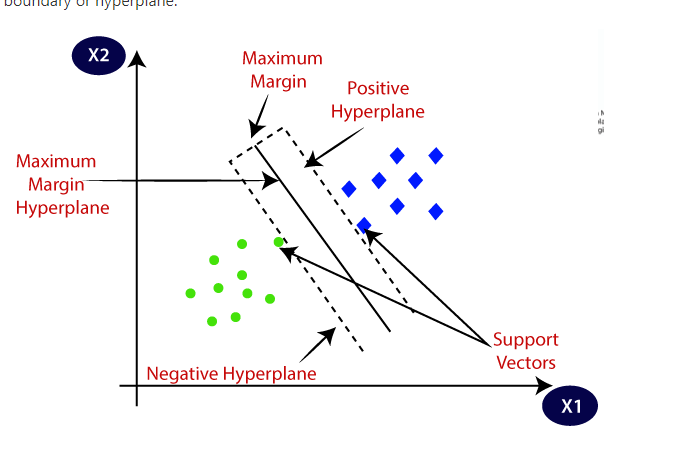

* **Applications:** SVMs are effective for tasks like image classification, text categorization, and anomaly detection.

**3. K-Nearest Neighbors (KNN)**

* **Description:** KNN is a simple yet effective algorithm that classifies data points based on the **majority vote of its k nearest neighbors**. The value of k is a hyperparameter that needs to be tuned for optimal performance.

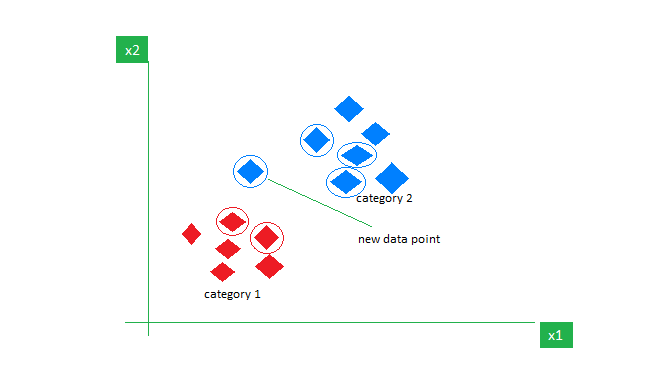

* **Applications:** KNN is often used for tasks like handwritten digit recognition and recommender systems.

**4. Decision Tree**

* **Description:** Decision trees are tree-like models where each internal node represents a **feature (attribute)** of the data, and each branch represents a possible decision based on the feature value. The decision tree is built by recursively splitting the data based on the features that best separate the classes.

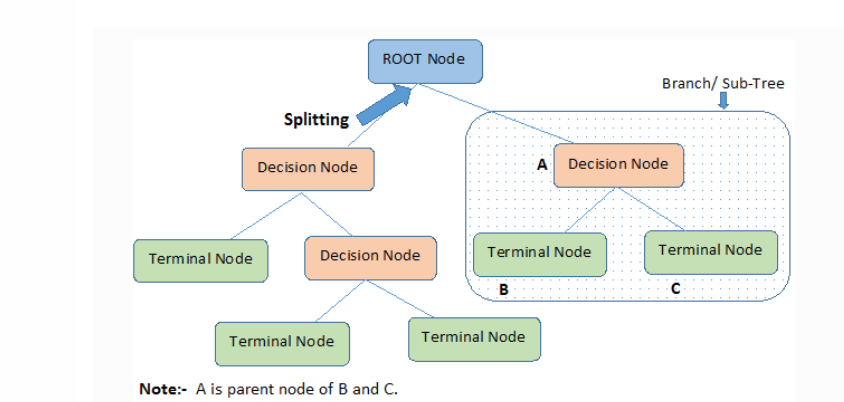

* **Applications:** Decision trees are interpretable models, making them useful for tasks where understanding the decision-making process is important. They are also used in fraud detection and credit scoring.

**5. Random Forest**

* **Description:** Random forests are ensembles of decision trees. Each tree in the forest is trained on a random subset of features and a random subset of data points (with replacement). Predictions are made by aggregating the predictions of all the trees in the forest (e.g., by majority vote for classification).

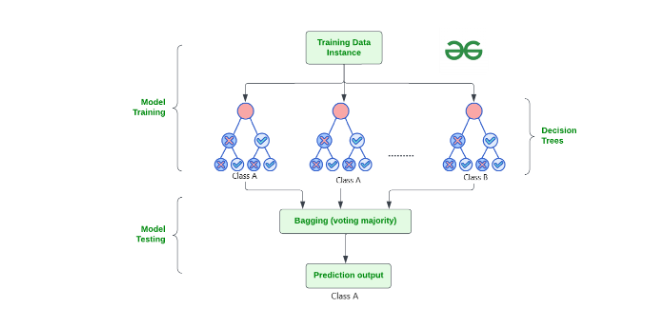

* **Applications:** Random forests are generally robust to overfitting and often outperform single decision trees. They are used in various tasks like image classification, customer churn prediction, and stock price forecasting.

**6. Naive Bayes**

* **Description:** Naive Bayes classifiers are a family of algorithms based on **Bayes' theorem**. They assume independence between features, which might not always be true in real-world datasets. However, they can be surprisingly effective for certain classification problems due to their simplicity and efficiency.

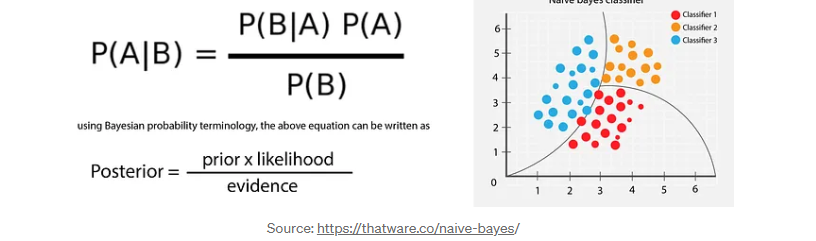

* **Applications:** Naive Bayes is a good choice for tasks like spam filtering and sentiment analysis where the assumption of feature independence might be reasonable.

**7. Gradient Boosting**

* **Description:** Gradient boosting algorithms are sequential learning models where new models are learned to **correct the errors of previous models**. This is achieved by fitting the new model to the residuals (errors) of the previous model. XGBoost and LightGBM are popular examples of gradient boosting algorithms.

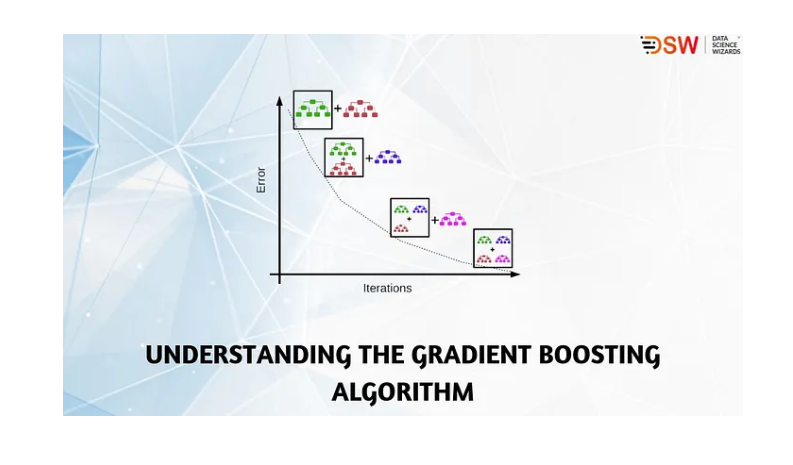

* **Applications:** Gradient boosting algorithms are powerful and can be used for a wide range of classification tasks, especially when dealing with complex datasets.

Remember, this is just a high-level overview of these algorithms. There are many resources available online for further exploration and in-depth learning.


# Machine Learning Classifiers Overview

## Logistic Regression:
Logistic Regression is a linear model used for binary classification problems. It models the probability of a binary outcome using a logistic function. Despite its name, it's actually used for classification rather than regression tasks.

## Decision Tree Classifier:
Decision Trees are a non-linear model used for both classification and regression tasks. They partition the input space into regions and assign labels to these regions based on the majority class within each region. They're easy to interpret and understand, making them popular for simple classification tasks.

## Gradient Boosting Classifier:
Gradient Boosting is an ensemble learning technique used for classification and regression tasks. It builds a series of weak learners (typically decision trees) sequentially, with each new learner correcting errors made by the previous ones. Gradient Boosting tends to produce very accurate models but can be computationally expensive and prone to overfitting if not properly tuned.

## K-Nearest Neighbors (KNN) Classifier:
KNN is a non-parametric, instance-based learning algorithm used for classification tasks. It classifies new instances based on the majority class among their k nearest neighbors in the feature space. KNN is simple and easy to understand, but it can be computationally expensive, especially with large datasets.

## Gaussian Naive Bayes:
Naive Bayes is a probabilistic classifier based on Bayes' theorem and the assumption of independence between features. Gaussian Naive Bayes assumes that the features follow a Gaussian distribution. It's computationally efficient and works well with high-dimensional data, although it may not capture complex relationships between features.

## Multinomial Naive Bayes:
Multinomial Naive Bayes is another variant of the Naive Bayes classifier. It's specifically designed for classification tasks with discrete features (e.g., word counts in text classification). It's commonly used in text classification tasks, such as sentiment analysis or spam detection.

## Random Forest Classifier:
Random Forest is an ensemble learning method that constructs multiple decision trees during training. Each tree in the forest operates independently and assigns a class label based on a majority vote of all the trees. Random Forest is robust, handles high-dimensional data well, and is less prone to overfitting compared to individual decision trees.

## Stochastic Gradient Descent (SGD) Classifier:
SGD Classifier is a linear classifier that uses stochastic gradient descent to optimize the model parameters. It's suitable for large-scale classification problems, as it updates the model parameters incrementally based on individual training examples. SGD Classifier is efficient and works well with sparse data.

## XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of gradient boosting. It's designed to be highly efficient, scalable, and accurate. XGBoost incorporates regularization techniques to prevent overfitting and can handle missing values in the data.
